In [ ]:
# !pip install polars

In [1]:
import pandas as pd
import numpy as np
import polars as pl

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Projects/Final-DS/classification_data.csv")
df.head(3)

count_session  count_hit channelGrouping  totals_newVisits  \
0              9       1194         (Other)                 0   
1              9       1194         (Other)                 0   
2             28       1816     Paid Search                 0   

    device_browser device_operatingSystem  device_isMobile  \
0  GoogleAnalytics                Android             True   
1  GoogleAnalytics                Android             True   
2  GoogleAnalytics                Android             True   

  device_deviceCategory geoNetwork_region  geoNetwork_latitude  ...  \
0                mobile           Sharjah              25.3463  ...   
1                mobile           Sharjah              25.3463  ...   
2                mobile             Ajman              25.4052  ...   

         latest_keyword  earliest_isTrueDirect  latest_isTrueDirect  \
0             (not set)                   True                 True   
1             (not set)                   True                 True   
2  (automatic matching)                   True                 True   

   num_interactions  bounces  time_on_site  transactionRevenue  \
0              1900        0          5617                   0   
1              1900        0          5617                   0   
2              3843        0         77417          1477195214   

                                      products_array  has_converted  \
0                               food////food////food              0   
1                               food////food////food              0   
2  (not set)////baby_products--milk,_food_&_juice...              1   

   target_date  
0   2021-01-01  
1   2021-01-01  
2   2021-01-01  

[3 rows x 46 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  object 
 5   device_operatingSystem  100000 non-null  object 
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  object 
 8   geoNetwork_region       100000 non-null  object 
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  youtube                 100000 non-null  int64  
 14  avg_session_time     

In [5]:
df.shape

(100000, 46)

In [6]:
df.describe().T

count          mean           std           min  \
count_session           100000.0  2.153244e+01  2.400239e+01  1.000000e+00   
count_hit               100000.0  3.671723e+03  4.627339e+03  2.000000e+00   
totals_newVisits        100000.0  2.038000e-02  1.412970e-01  0.000000e+00   
geoNetwork_latitude     100000.0  2.491853e+01  3.352055e+00 -3.392490e+01   
geoNetwork_longitude    100000.0  5.427488e+01  7.911686e+00 -8.762980e+01   
historic_session        100000.0  9.692262e+03  1.289163e+04  2.000000e+00   
historic_session_page   100000.0  1.875326e+03  5.222528e+03  0.000000e+00   
youtube                 100000.0  0.000000e+00  0.000000e+00  0.000000e+00   
avg_session_time        100000.0  6.170504e+02  6.704941e+02  2.000000e+00   
avg_session_time_page   100000.0  2.377027e+02  6.428773e+02  0.000000e+00   
single_page_rate        100000.0  8.681554e-01  2.746652e-01  0.000000e+00   
sessionQualityDim       100000.0  1.498554e+01  1.858126e+01  1.000000e+00   
last_visitId            100000.0  1.619194e+09  1.417897e+06  1.609492e+09   
latest_visit_id         100000.0  1.619194e+09  1.417897e+06  1.609492e+09   
visitId_threshold       100000.0  1.616602e+09  1.417897e+06  1.606900e+09   
earliest_visit_id       100000.0  1.617289e+09  1.310485e+06  1.606934e+09   
earliest_visit_number   100000.0  5.580513e+01  9.740128e+01  1.000000e+00   
latest_visit_number     100000.0  2.099197e+02  2.580841e+03  1.000000e+00   
time_earliest_visit     100000.0  1.244926e+01  5.322924e+00  0.000000e+00   
time_latest_visit       100000.0  1.328067e+01  5.284200e+00  0.000000e+00   
avg_visit_time          100000.0  1.253589e+01  3.091108e+00  0.000000e+00   
days_since_last_visit   100000.0  0.000000e+00  0.000000e+00  0.000000e+00   
days_since_first_visit  100000.0  2.202890e+01  9.814491e+00  0.000000e+00   
visits_per_day          100000.0  1.889594e+02  2.066670e+02  9.230769e-01   
bounce_rate             100000.0  9.081200e-03  8.492984e-02  0.000000e+00   
num_interactions        100000.0  1.213933e+04  1.510693e+04  2.000000e+01   
bounces                 100000.0  1.690000e-03  1.125490e-01  0.000000e+00   
time_on_site            100000.0  1.588642e+04  4.796398e+04  0.000000e+00   
transactionRevenue      100000.0  1.945557e+08  5.557385e+08  0.000000e+00   
has_converted           100000.0  5.172700e-01  4.997042e-01  0.000000e+00   

                                 25%           50%           75%           max  
count_session           6.000000e+00  1.500000e+01  2.900000e+01  2.700000e+02  
count_hit               9.710000e+02  2.209000e+03  4.812000e+03  4.874400e+04  
totals_newVisits        0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
geoNetwork_latitude     2.445390e+01  2.520480e+01  2.520480e+01  5.932930e+01  
geoNetwork_longitude    5.437730e+01  5.527080e+01  5.527080e+01  1.403187e+02  
historic_session        2.694000e+03  5.864000e+03  1.185800e+04  1.817150e+05  
historic_session_page   0.000000e+00  0.000000e+00  1.985000e+03  9.989600e+04  
youtube                 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
avg_session_time        2.640968e+02  3.965463e+02  6.868750e+02  5.441000e+03  
avg_session_time_page   0.000000e+00  0.000000e+00  1.344375e+02  5.441000e+03  
single_page_rate        8.888889e-01  1.000000e+00  1.000000e+00  1.000000e+00  
sessionQualityDim       2.000000e+00  4.000000e+00  2.100000e+01  1.000000e+02  
last_visitId            1.619268e+09  1.619720e+09  1.619865e+09  1.619899e+09  
latest_visit_id         1.619268e+09  1.619720e+09  1.619865e+09  1.619899e+09  
visitId_threshold       1.616676e+09  1.617128e+09  1.617273e+09  1.617307e+09  
earliest_visit_id       1.617169e+09  1.617360e+09  1.617697e+09  1.619899e+09  
earliest_visit_number   3.000000e+00  1.800000e+01  6.700000e+01  2.642000e+03  
latest_visit_number     3.500000e+01  8.200000e+01  1.660000e+02  8.293000e+04  
time_earliest_visit     8.180000e+00  1.220000e+01  1.685000e+01  2.3

In [7]:
df.dtypes

count_session               int64
count_hit                   int64
channelGrouping            object
totals_newVisits            int64
device_browser             object
device_operatingSystem     object
device_isMobile              bool
device_deviceCategory      object
geoNetwork_region          object
geoNetwork_latitude       float64
geoNetwork_longitude      float64
historic_session            int64
historic_session_page       int64
youtube                     int64
avg_session_time          float64
avg_session_time_page     float64
single_page_rate          float64
sessionQualityDim           int64
last_visitId                int64
latest_visit_id             int64
visitId_threshold           int64
earliest_visit_id           int64
earliest_visit_number       int64
latest_visit_number         int64
time_earliest_visit       float64
time_latest_visit         float64
avg_visit_time              int64
days_since_last_visit       int64
days_since_first_visit      int64
visits_per_day

In [8]:
df.isna().sum() # NIL

count_session             0
count_hit                 0
channelGrouping           0
totals_newVisits          0
device_browser            0
device_operatingSystem    0
device_isMobile           0
device_deviceCategory     0
geoNetwork_region         0
geoNetwork_latitude       0
geoNetwork_longitude      0
historic_session          0
historic_session_page     0
youtube                   0
avg_session_time          0
avg_session_time_page     0
single_page_rate          0
sessionQualityDim         0
last_visitId              0
latest_visit_id           0
visitId_threshold         0
earliest_visit_id         0
earliest_visit_number     0
latest_visit_number       0
time_earliest_visit       0
time_latest_visit         0
avg_visit_time            0
days_since_last_visit     0
days_since_first_visit    0
visits_per_day            0
bounce_rate               0
earliest_source           0
latest_source             0
earliest_medium           0
latest_medium             0
earliest_keyword    

In [9]:
df.has_converted.value_counts()

1    51727
0    48273
Name: has_converted, dtype: int64

In [10]:
df.duplicated().sum()

90793

In [11]:
df['target_date']

0        2021-01-01
1        2021-01-01
2        2021-01-01
3        2021-01-01
4        2021-01-01
            ...    
99995    2021-01-01
99996    2021-01-01
99997    2021-01-01
99998    2021-01-01
99999    2021-01-01
Name: target_date, Length: 100000, dtype: object

In [12]:
# handling date cols
df['target_date'] = pd.to_datetime(df['target_date'], errors='coerce')

In [13]:
object_cols = df.select_dtypes(include='object').columns.tolist()
object_cols

['channelGrouping',
 'device_browser',
 'device_operatingSystem',
 'device_deviceCategory',
 'geoNetwork_region',
 'earliest_source',
 'latest_source',
 'earliest_medium',
 'latest_medium',
 'earliest_keyword',
 'latest_keyword',
 'products_array']

In [14]:
df['has_converted'].isna().sum()

0

# EDA Analysis

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-16-423a4d97597d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


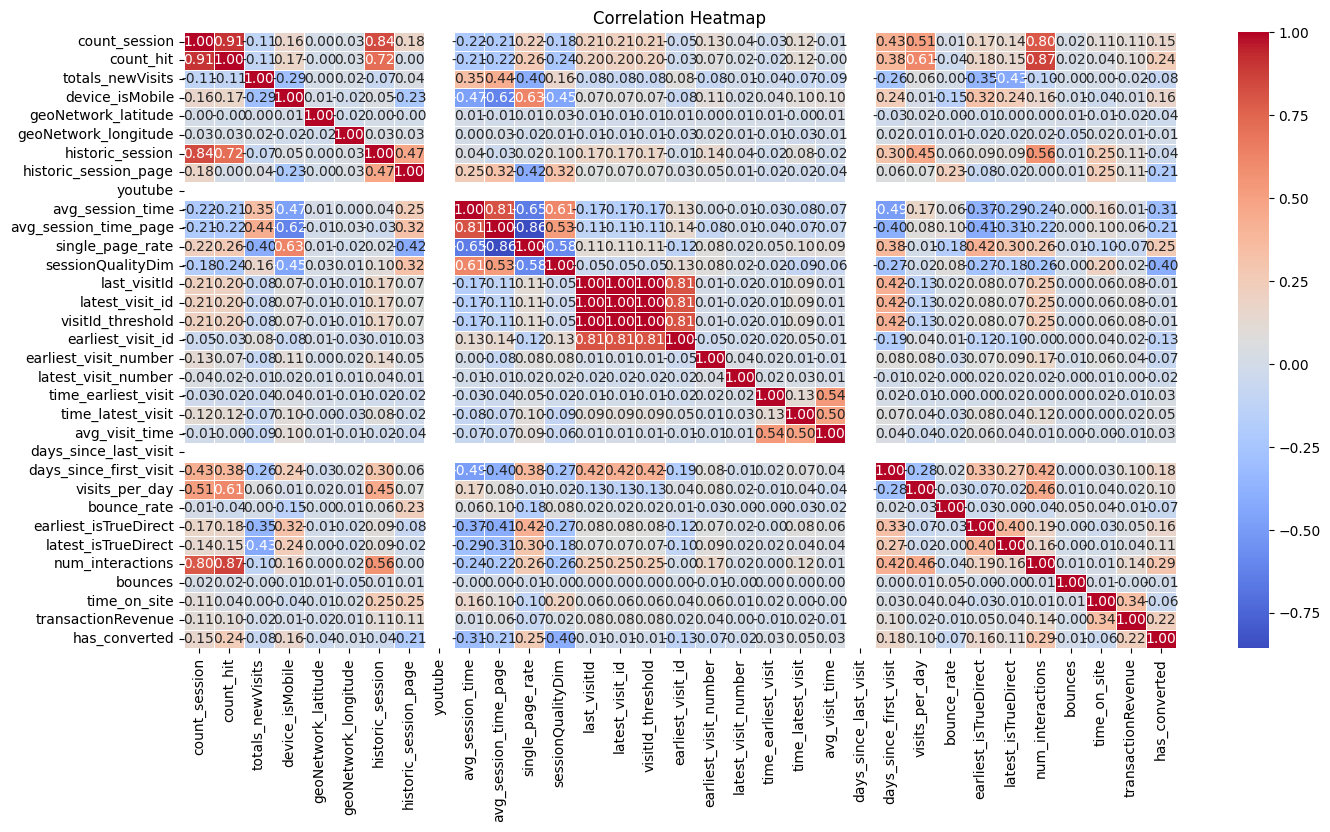

In [16]:
# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# Using the correlation matrix calculated above
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
correlation_pairs = correlation_pairs[correlation_pairs < 1]  # Remove self-correlations
print("Top correlated pairs:\n", correlation_pairs.head())

Top correlated pairs:
 count_session     count_hit           0.910768
count_hit         count_session       0.910768
num_interactions  count_hit           0.867587
count_hit         num_interactions    0.867587
historic_session  count_session       0.839560
dtype: float64


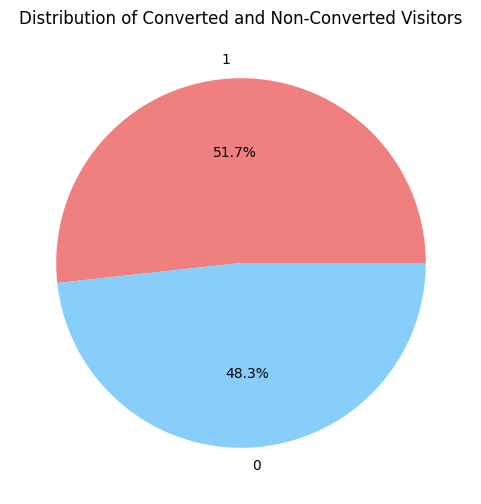

In [18]:
converted_counts = df['has_converted'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(converted_counts, labels=converted_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title("Distribution of Converted and Non-Converted Visitors")
plt.show()


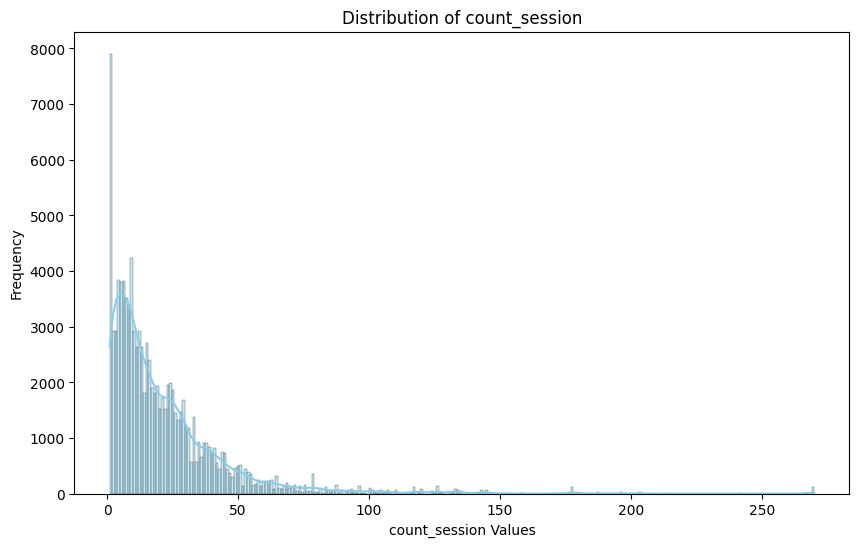

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['count_session'], kde=True, color='skyblue')
plt.title("Distribution of count_session")
plt.xlabel("count_session Values")
plt.ylabel("Frequency")
plt.show()

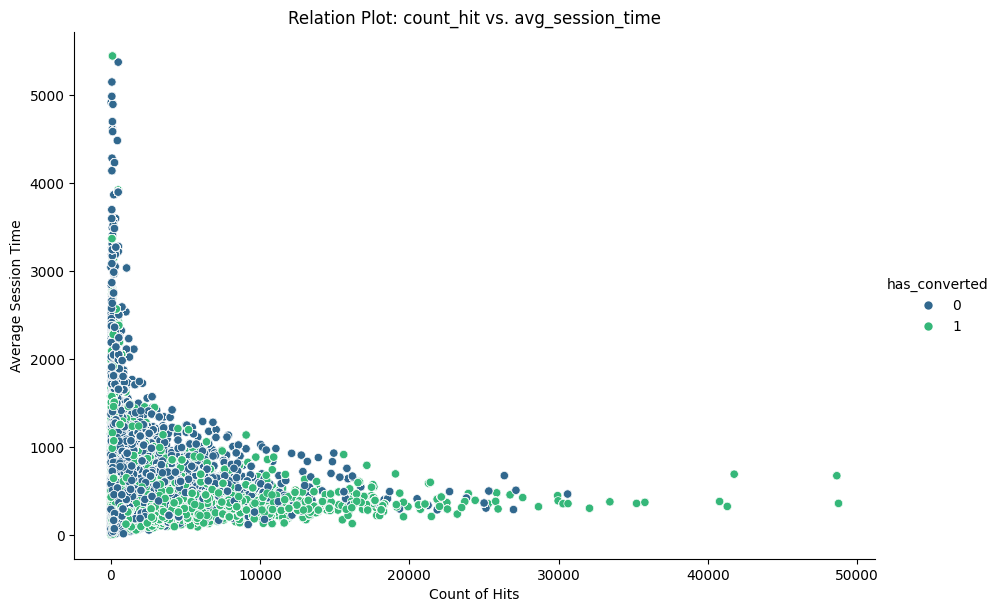

In [20]:
# Relational plot
sns.relplot(x="count_hit", y="avg_session_time", hue="has_converted", data=df, palette="viridis", height=6, aspect=1.5)
plt.title("Relation Plot: count_hit vs. avg_session_time")
plt.xlabel("Count of Hits")
plt.ylabel("Average Session Time")
plt.show()

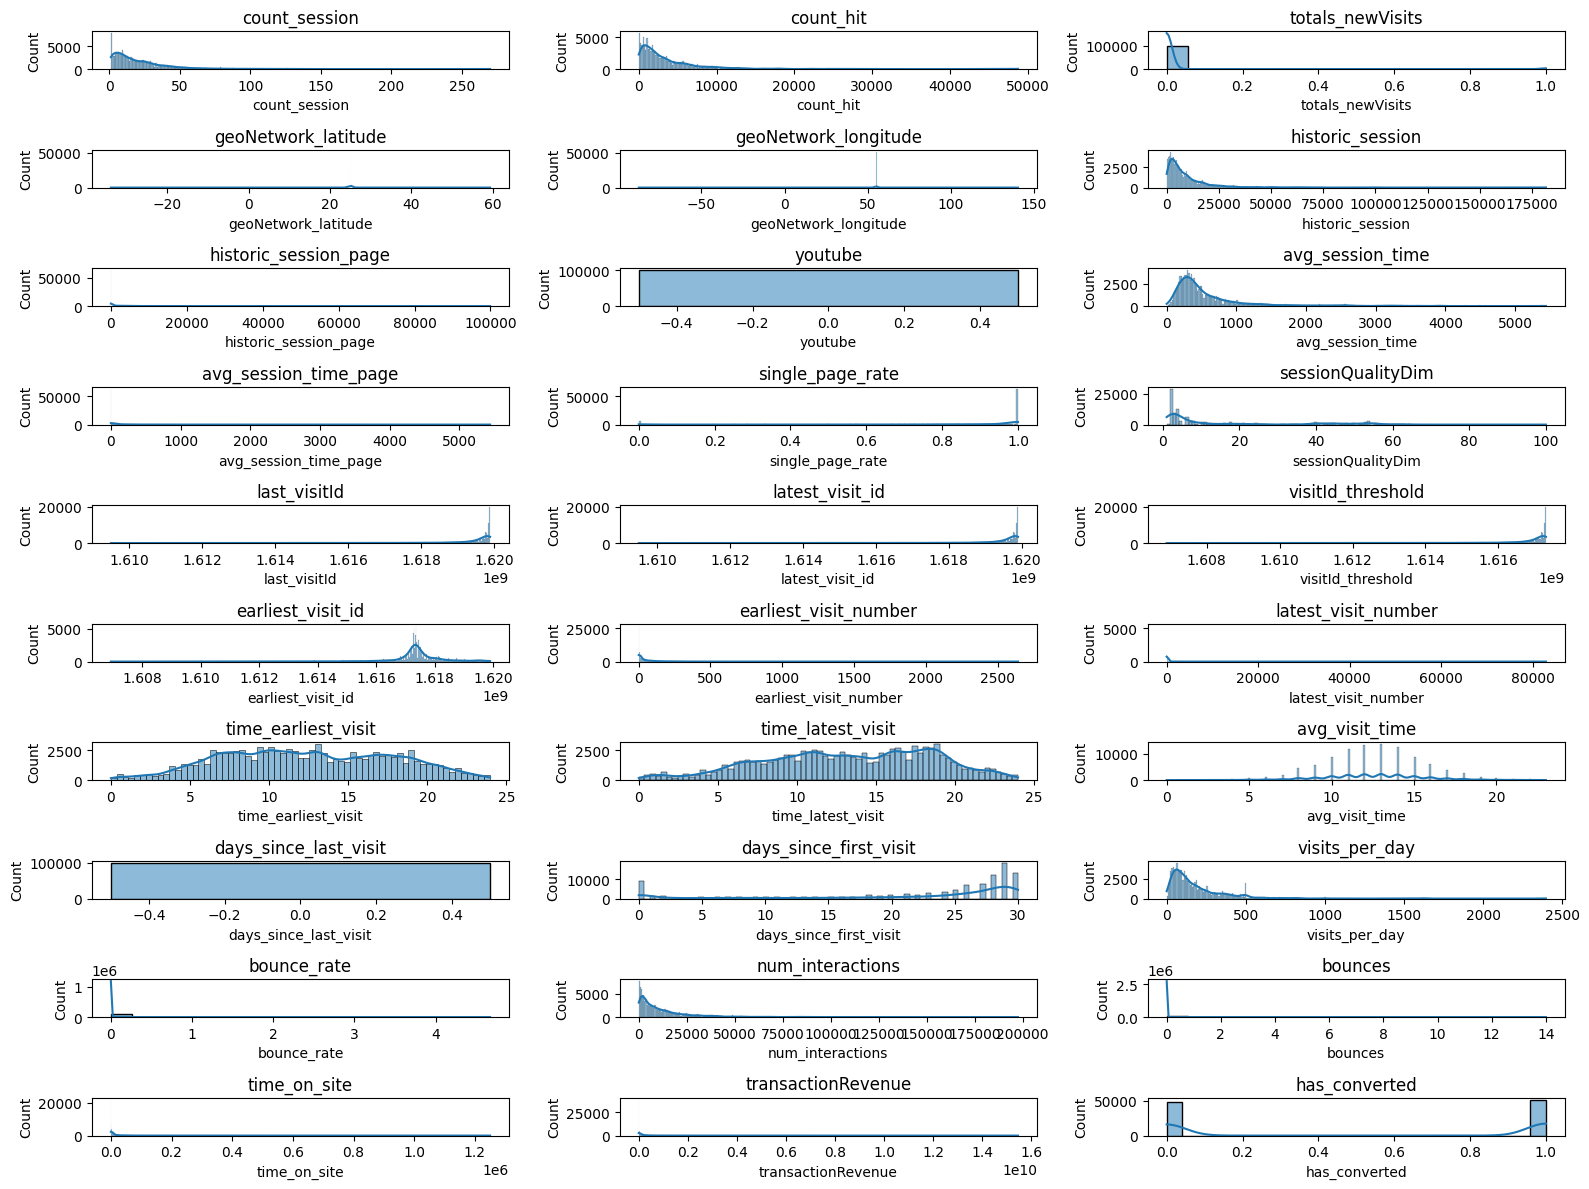

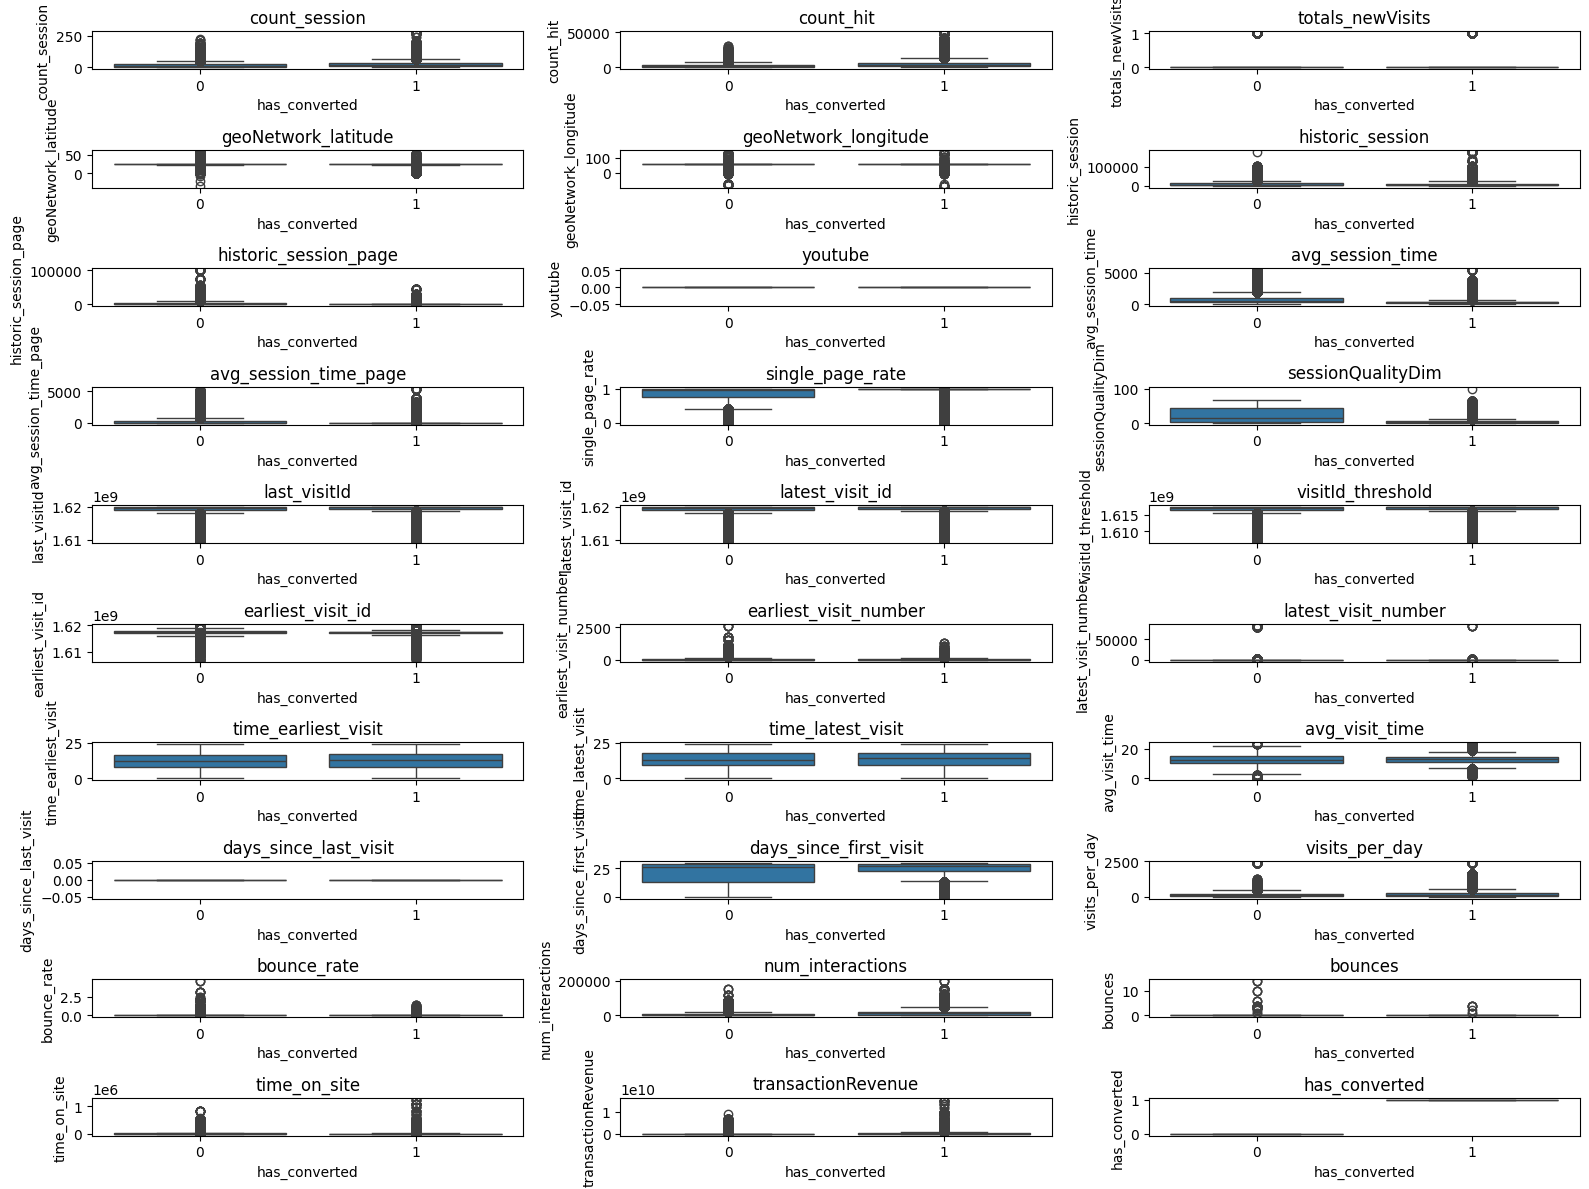

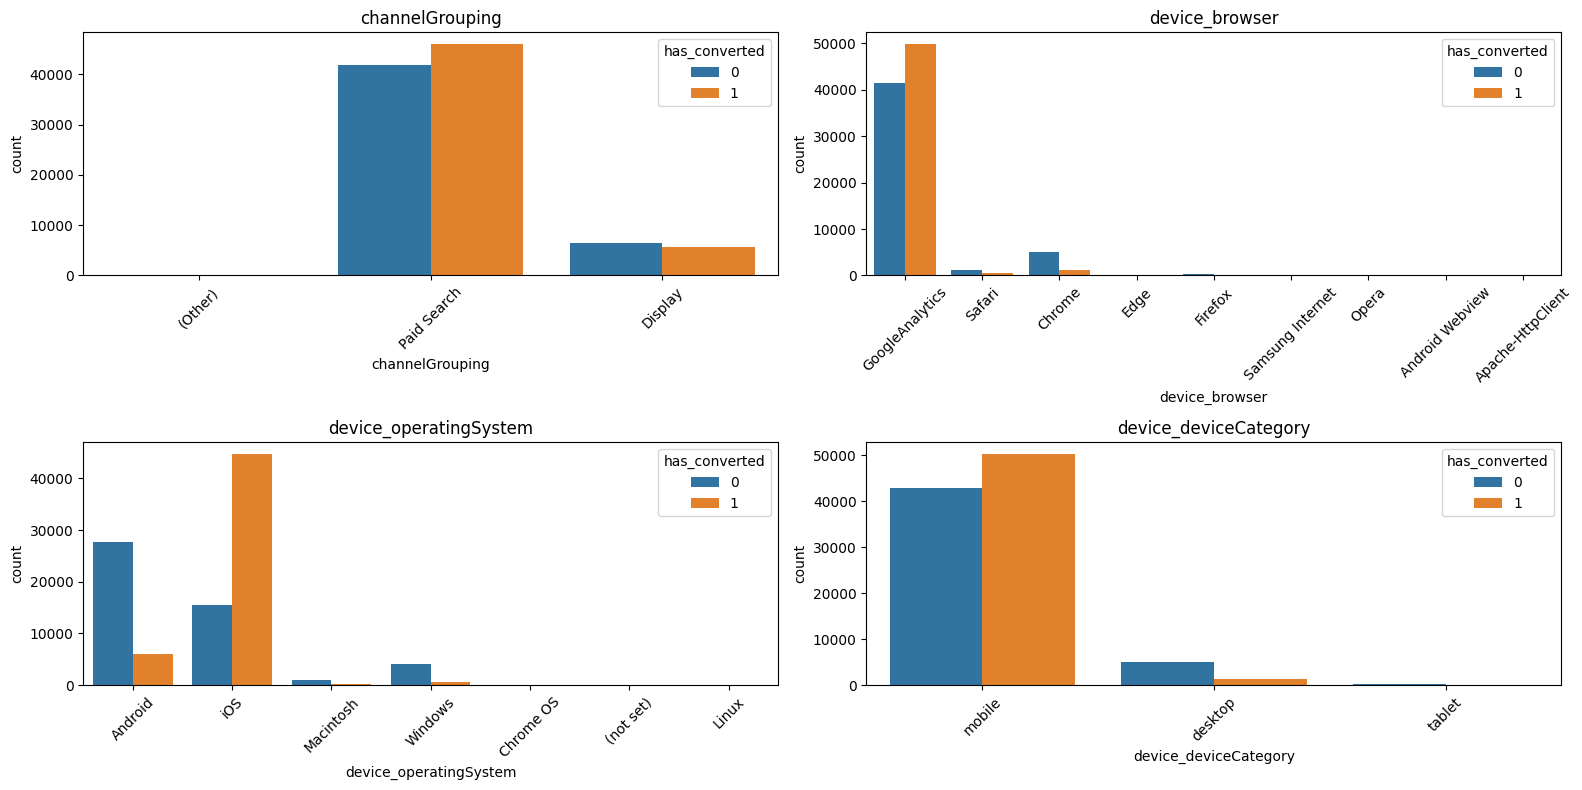

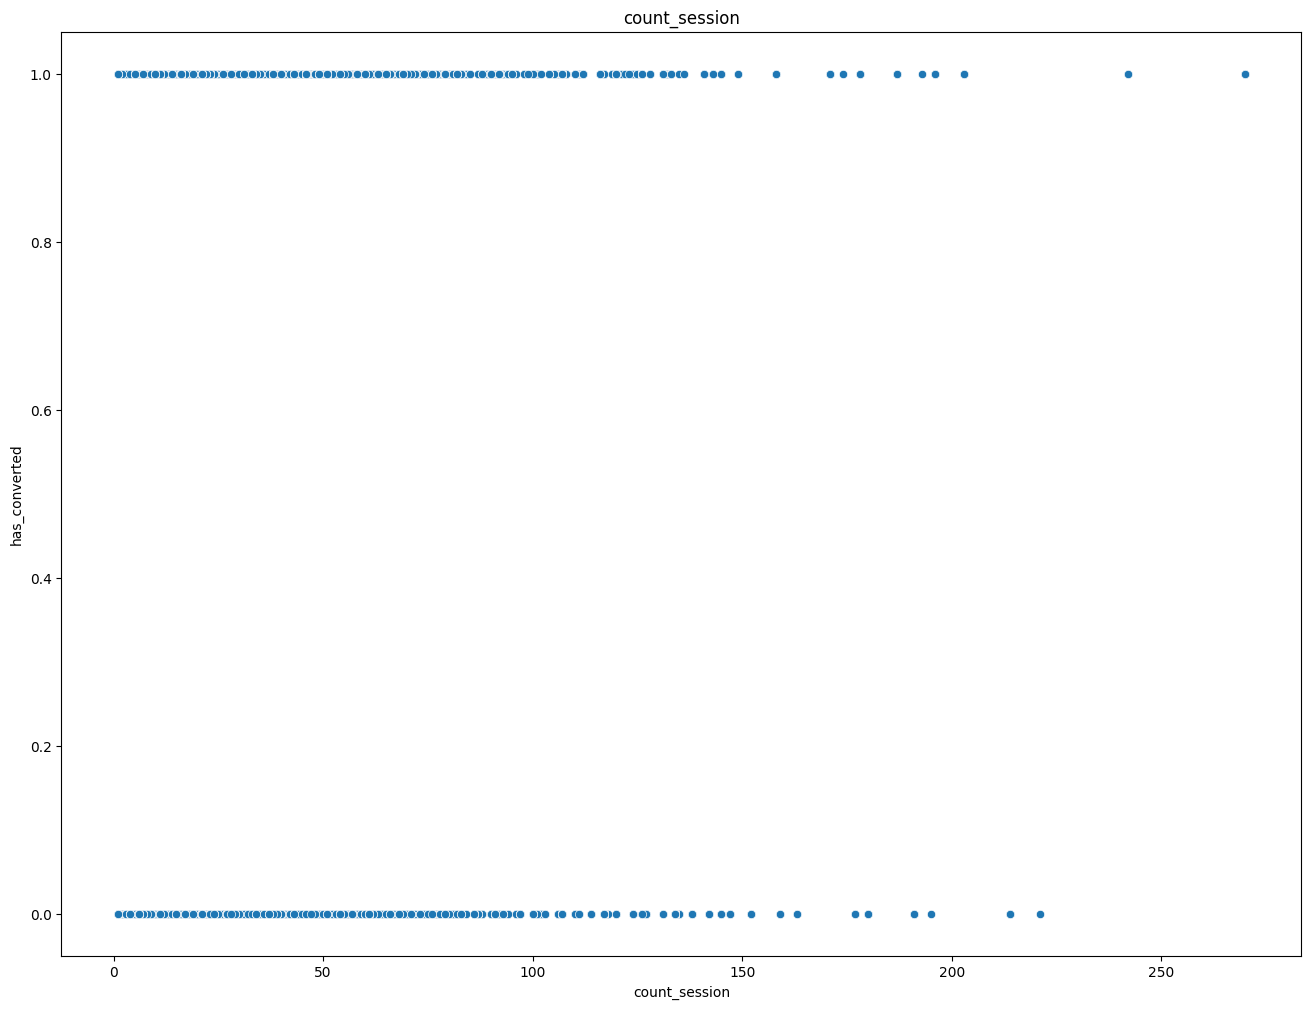

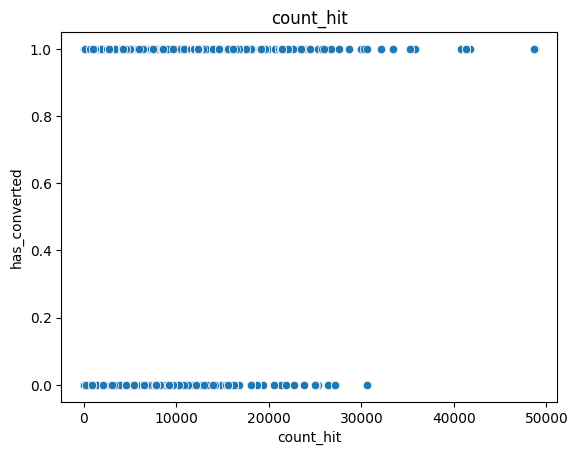

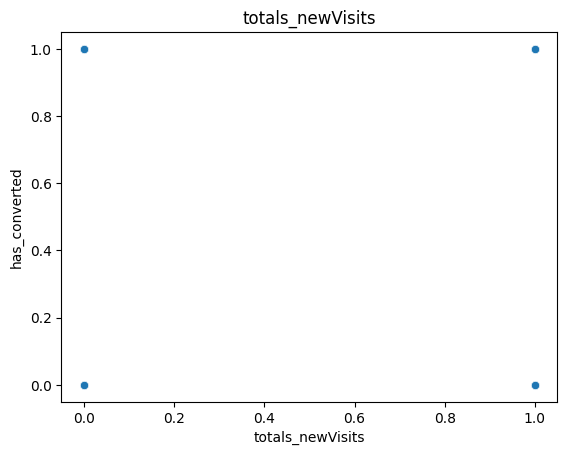

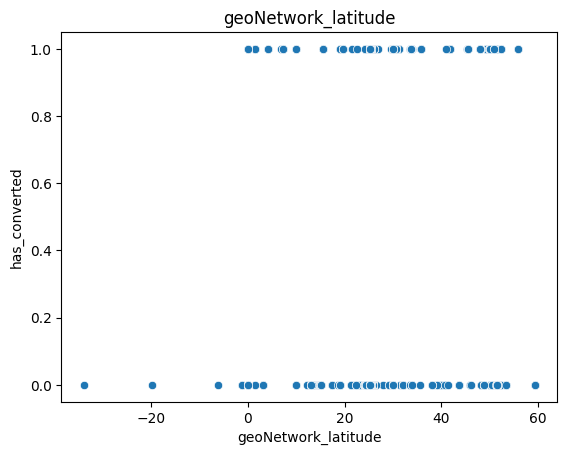

In [21]:
def univariate_plots():
    plt.figure(figsize=(16, 12))

    # Histograms for numeric features
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    num_cols = len(numeric_cols)
    rows_numeric = (num_cols - 1) // 3 + 1  # Calculate the number of rows needed for numeric plots
    for i, col in enumerate(numeric_cols):
        plt.subplot(rows_numeric, 3, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(col)

    plt.tight_layout()
    plt.show()

    # Box plots for numeric features
    plt.figure(figsize=(16, 12))
    for i, col in enumerate(numeric_cols):
        plt.subplot(rows_numeric, 3, i + 1)
        sns.boxplot(x=df['has_converted'], y=df[col])
        plt.title(col)

    plt.tight_layout()
    plt.show()

    # Count plots for categorical features (limit to 4 for brevity)
    categorical_cols = df.select_dtypes(include='object').columns[:4]
    num_cols_categorical = len(categorical_cols)
    rows_categorical = (num_cols_categorical - 1) // 2 + 1
    plt.figure(figsize=(16, 8))
    for i, col in enumerate(categorical_cols):
        plt.subplot(rows_categorical, 2, i + 1)
        sns.countplot(x=df[col], hue=df['has_converted'])
        plt.title(col)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Bivariate Plots
def bivariate_plots(numeric_cols):
    # Scatter plots for numeric features (limit to 4 for brevity)
    plt.figure(figsize=(16, 12))
    for col in numeric_cols[:4]:
        if col != 'has_converted':
            sns.scatterplot(x=df[col], y=df['has_converted'])
            plt.title(col)
            plt.show()

# Call the functions
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
univariate_plots()
bivariate_plots(numeric_cols)


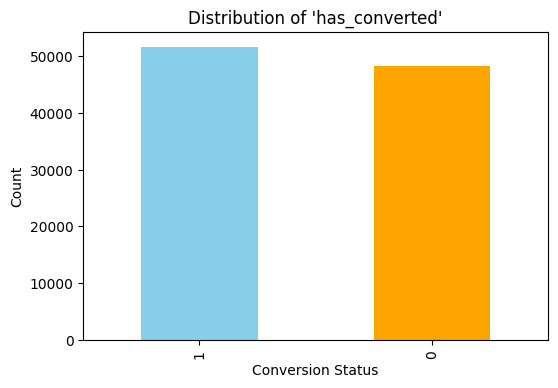

In [22]:
# Visualize the distribution of the target variable 'has_converted'
plt.figure(figsize=(6, 4))
converted_dist = df['has_converted'].value_counts()
converted_dist.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Distribution of 'has_converted'")
plt.xlabel("Conversion Status")
plt.ylabel("Count")
plt.show()

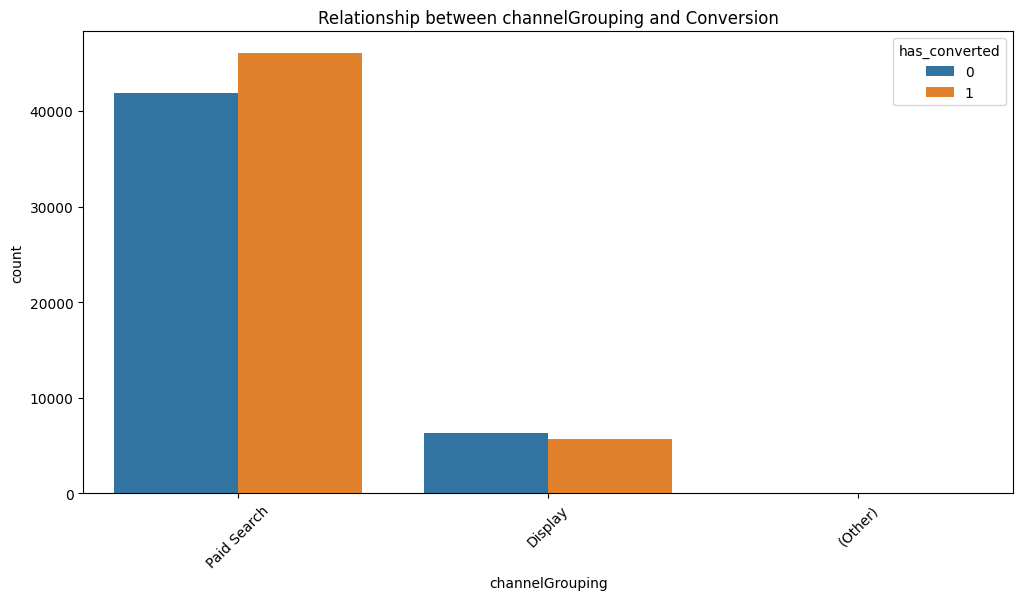

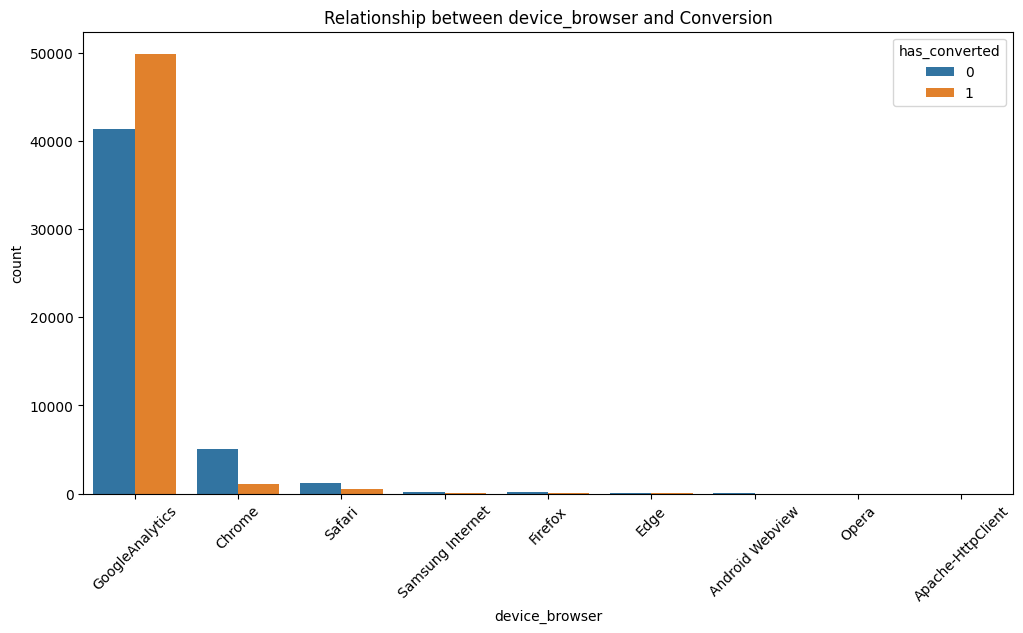

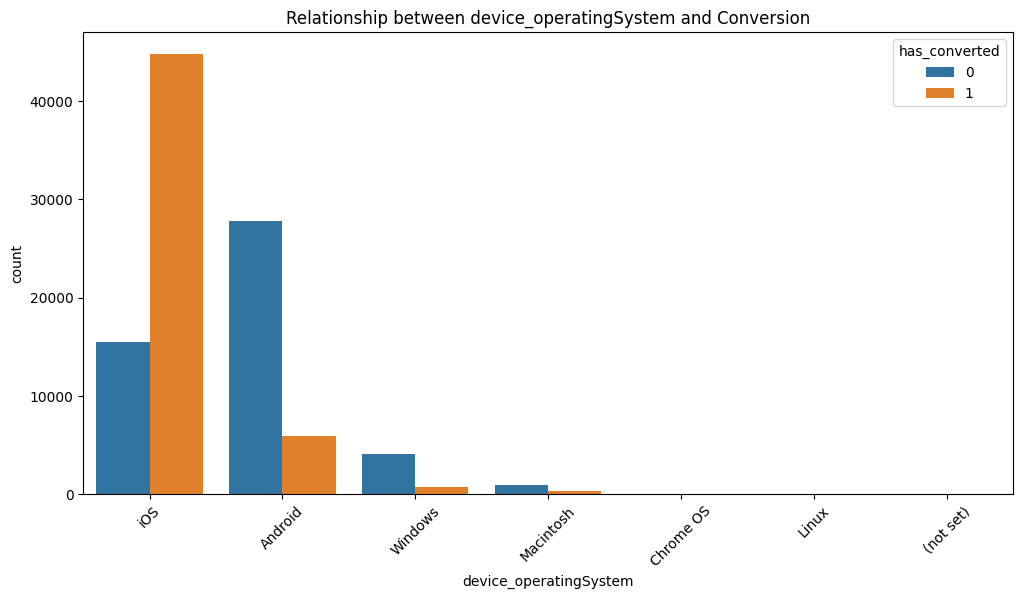

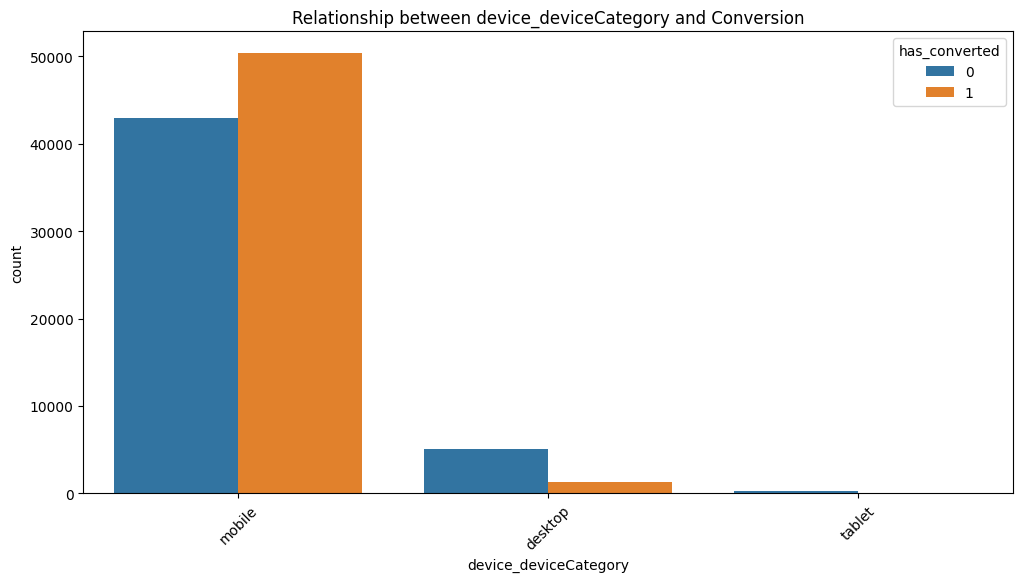

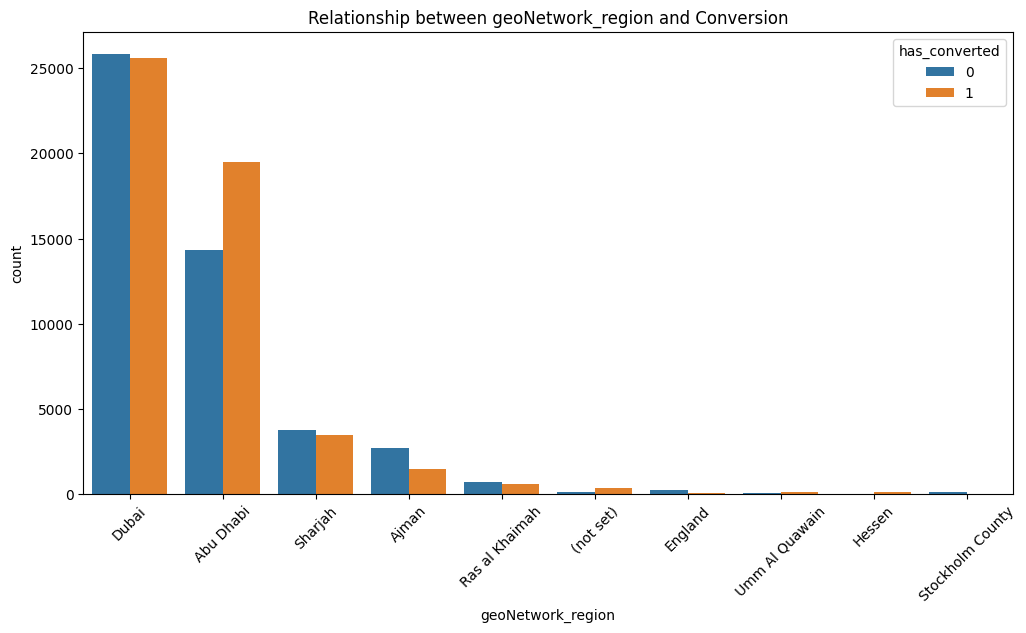

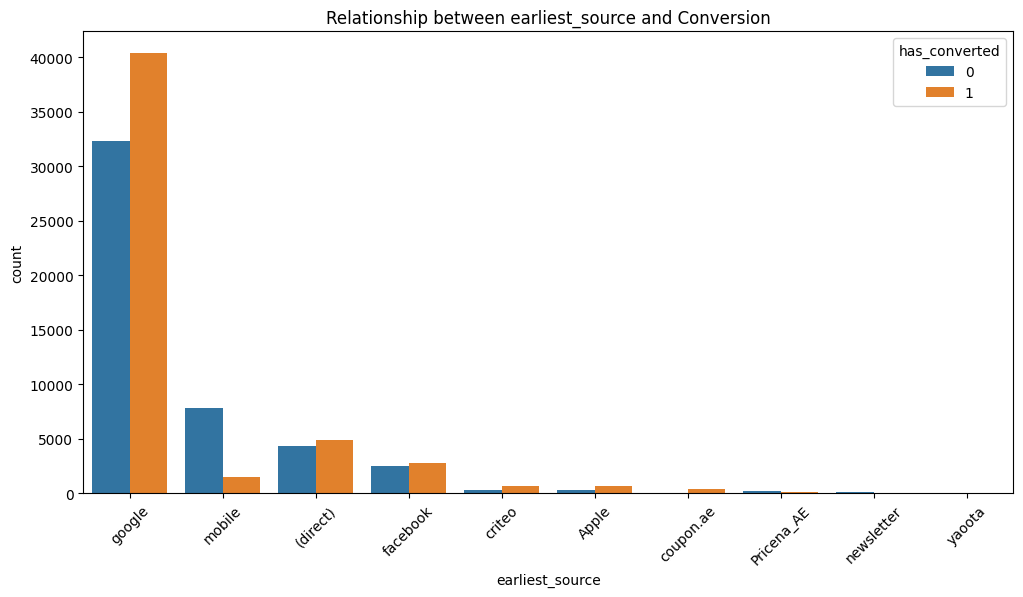

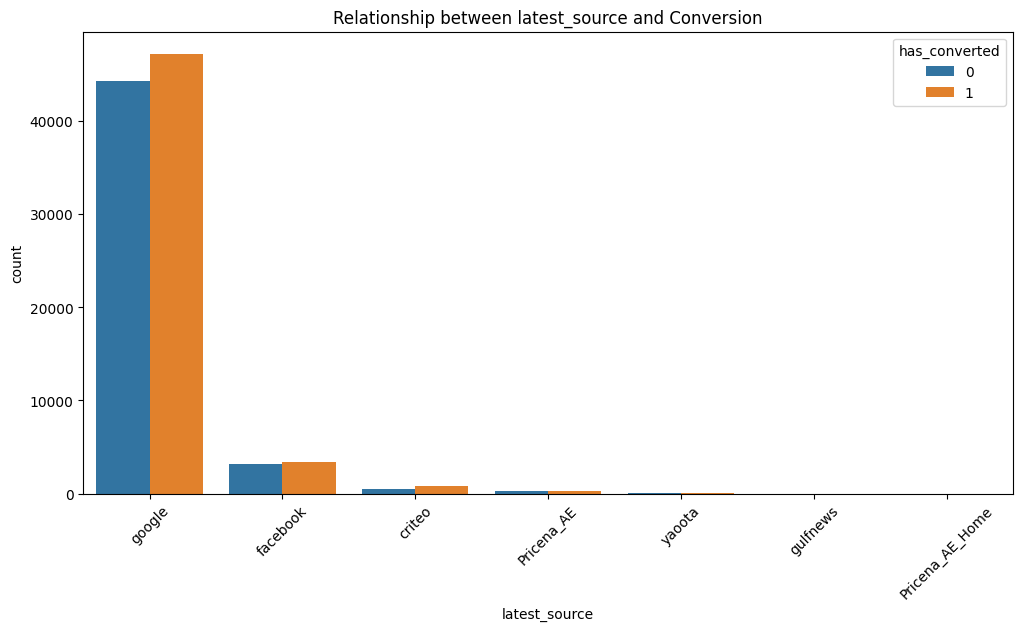

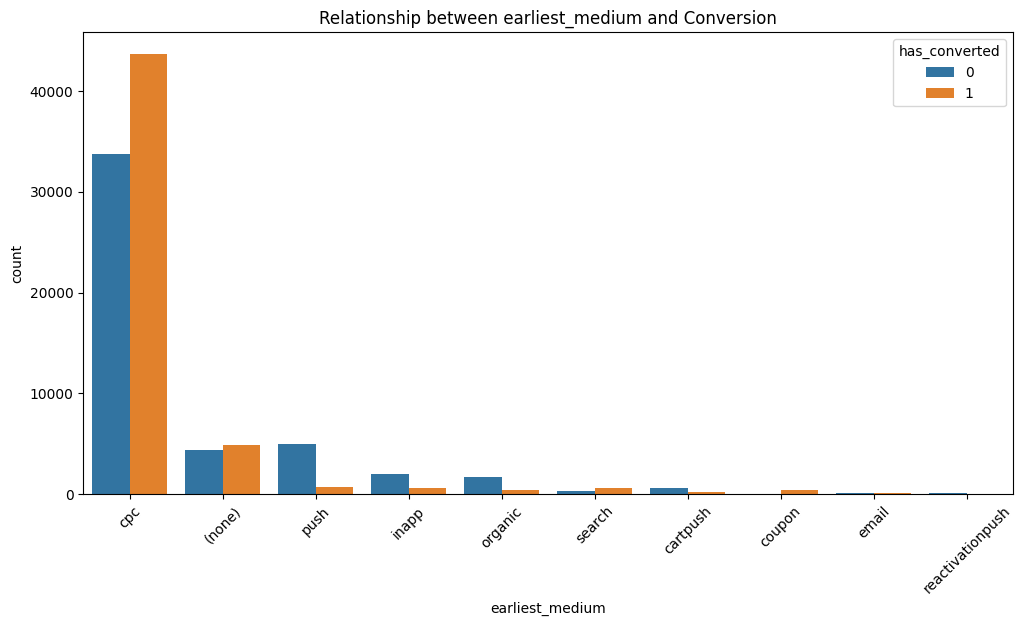

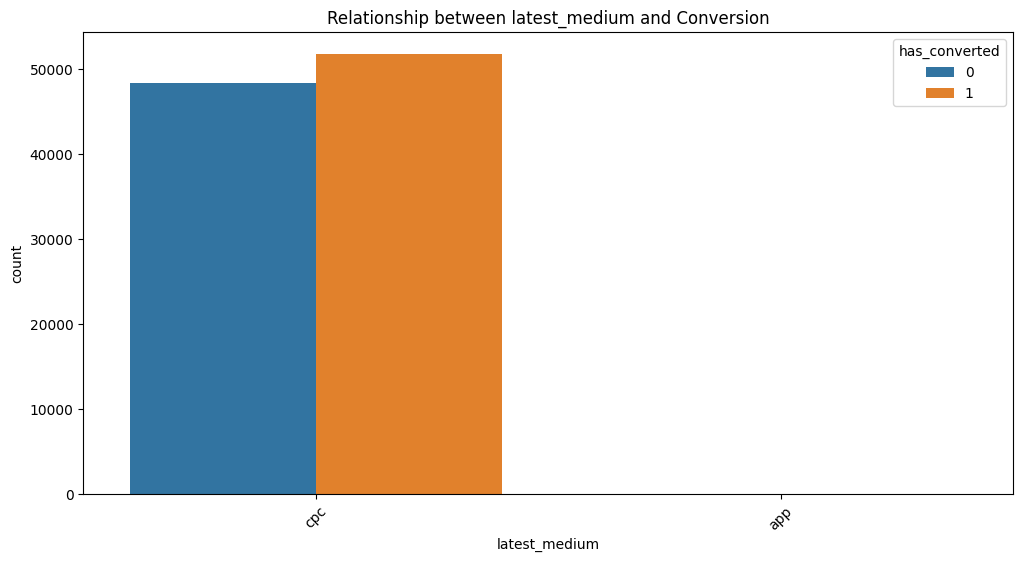

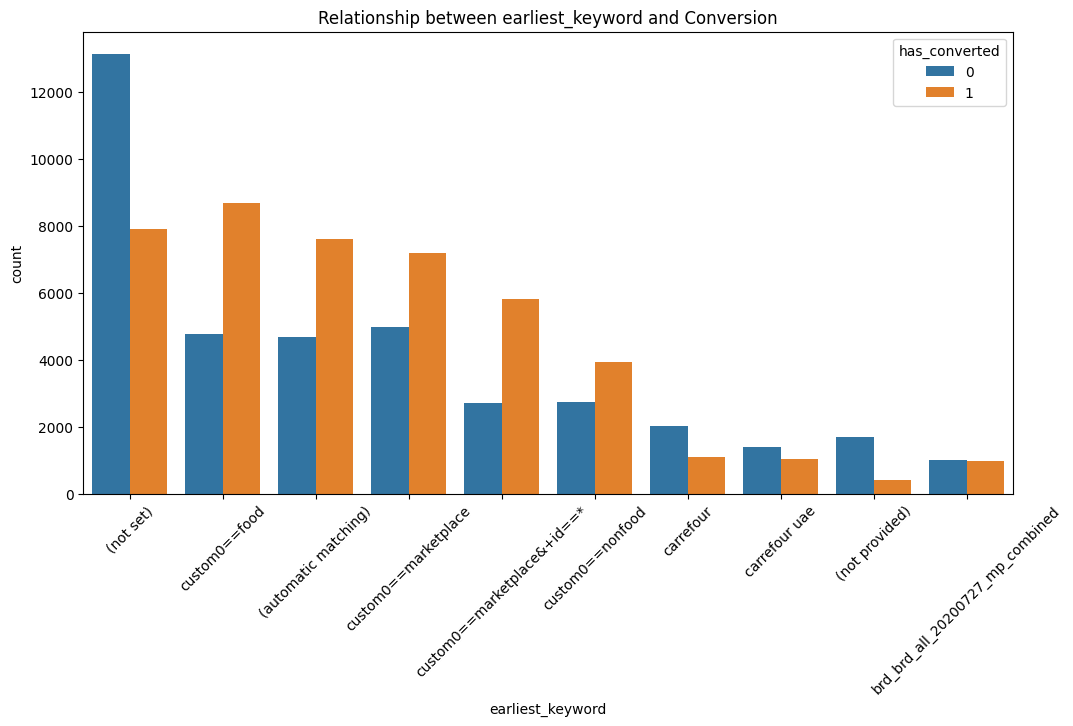

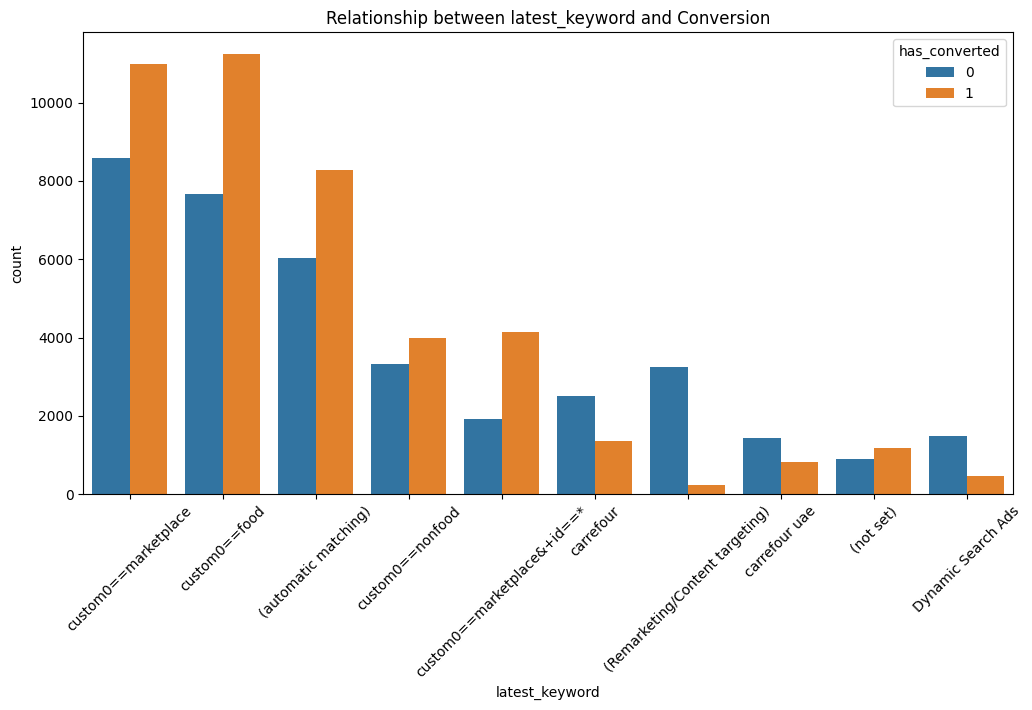

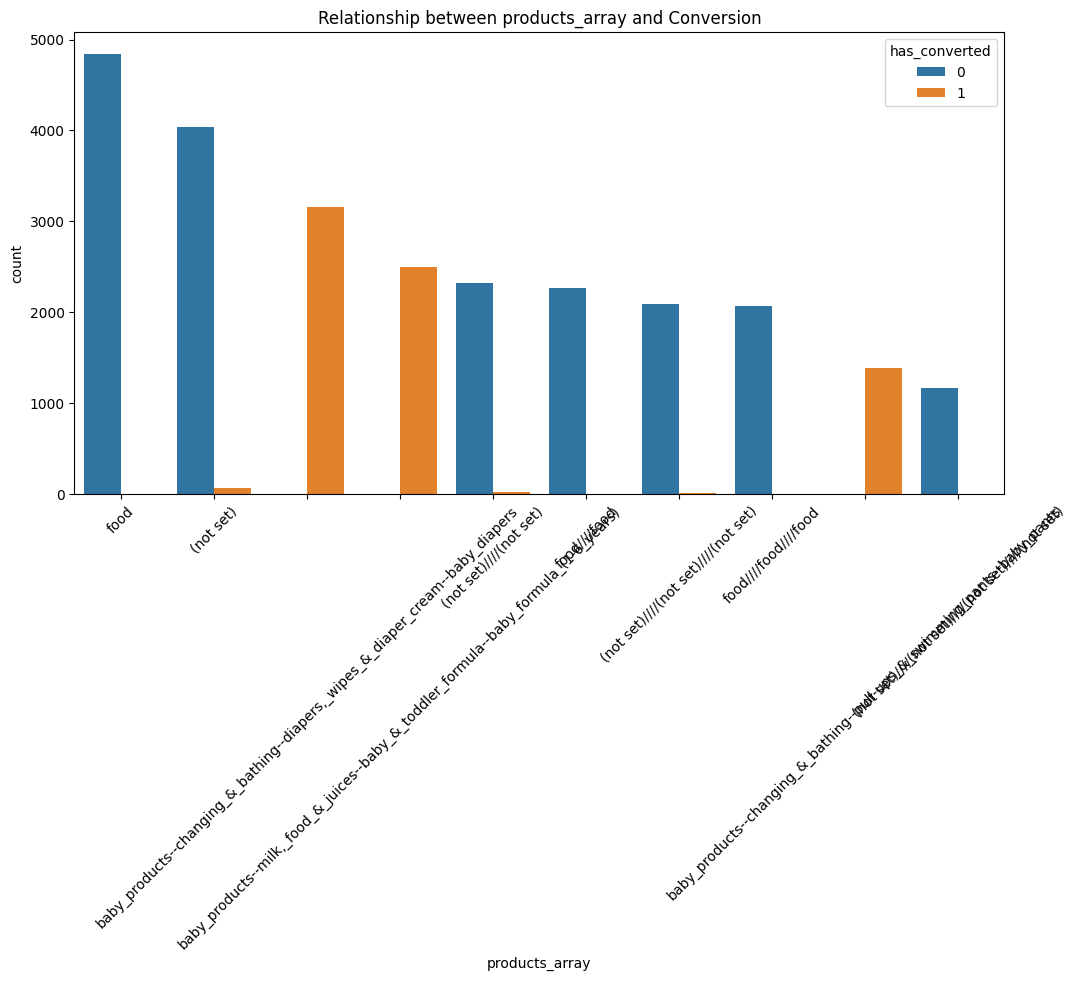

In [23]:
# Visualize the relationship between 'has_converted' and other categorical features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='has_converted', data=df, order=df[col].value_counts().index[:10])  # Limit to top 10 categories
    plt.title(f'Relationship between {col} and Conversion')
    plt.xticks(rotation=45)
    plt.show()


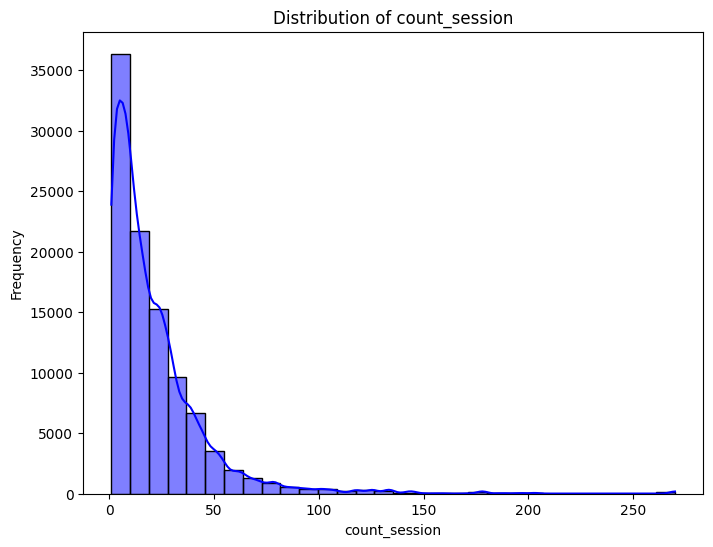

In [24]:
# Analysis single variable to understanding distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram for 'count_session'
plt.figure(figsize=(8, 6))
sns.histplot(df['count_session'], bins=30, kde=True, color='blue')
plt.title('Distribution of count_session')
plt.xlabel('count_session')
plt.ylabel('Frequency')
plt.show()


<ipython-input-25-dbeb47caa927>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='channelGrouping', data=df, palette='viridis')


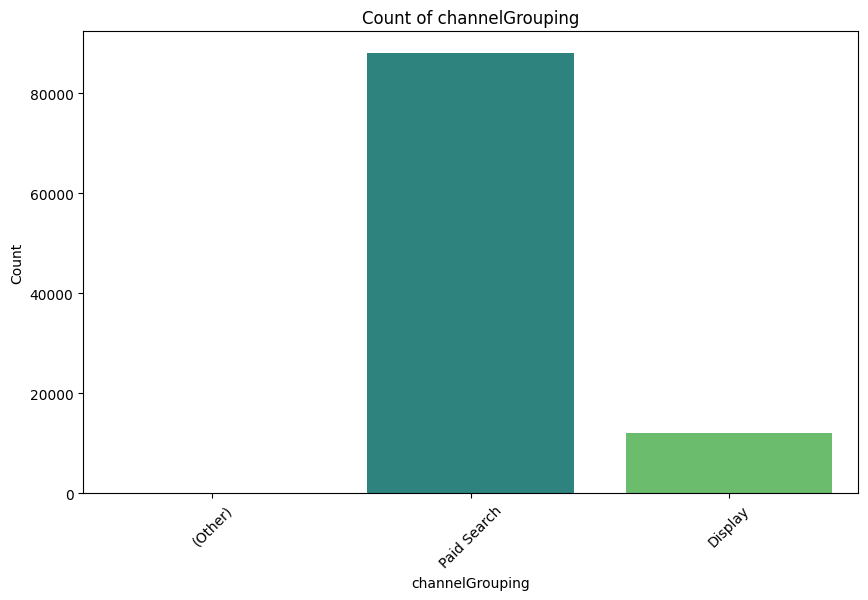

In [25]:
# Example: Count plot for 'channelGrouping'
plt.figure(figsize=(10, 6))
sns.countplot(x='channelGrouping', data=df, palette='viridis')
plt.title('Count of channelGrouping')
plt.xlabel('channelGrouping')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [26]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

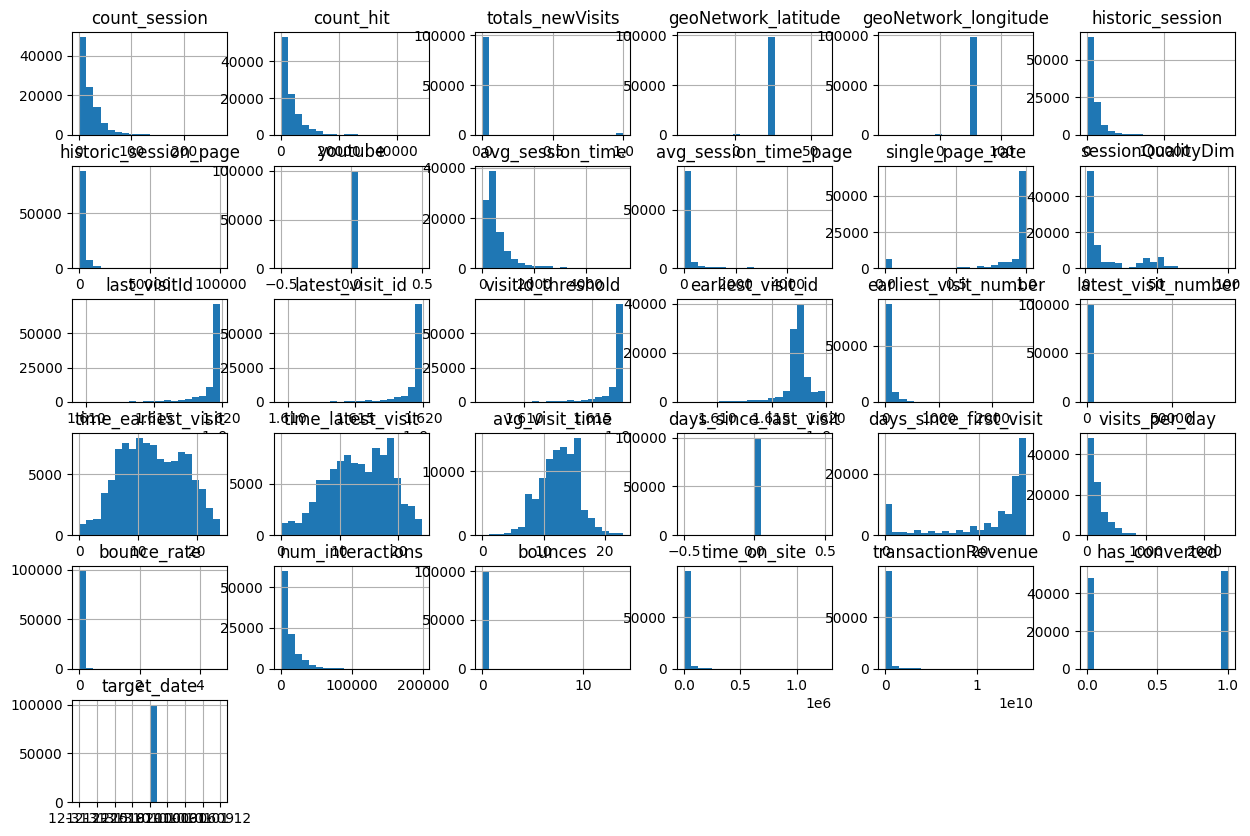

In [27]:
# Histograms
df.hist(figsize=(15, 10), bins=20)
plt.show()


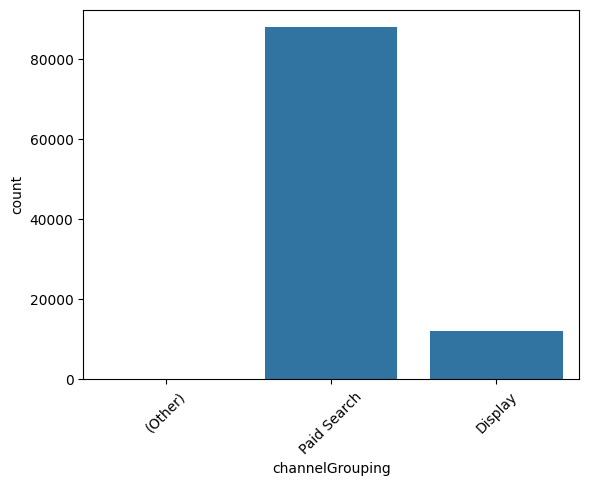

In [28]:
# Countplots for categorical variables
sns.countplot(x='channelGrouping', data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

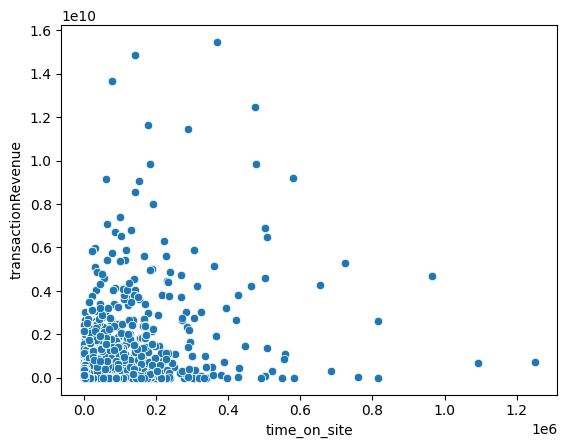

In [29]:
# Scatter Plot
sns.scatterplot(x='time_on_site', y='transactionRevenue', data=df)
plt.show()


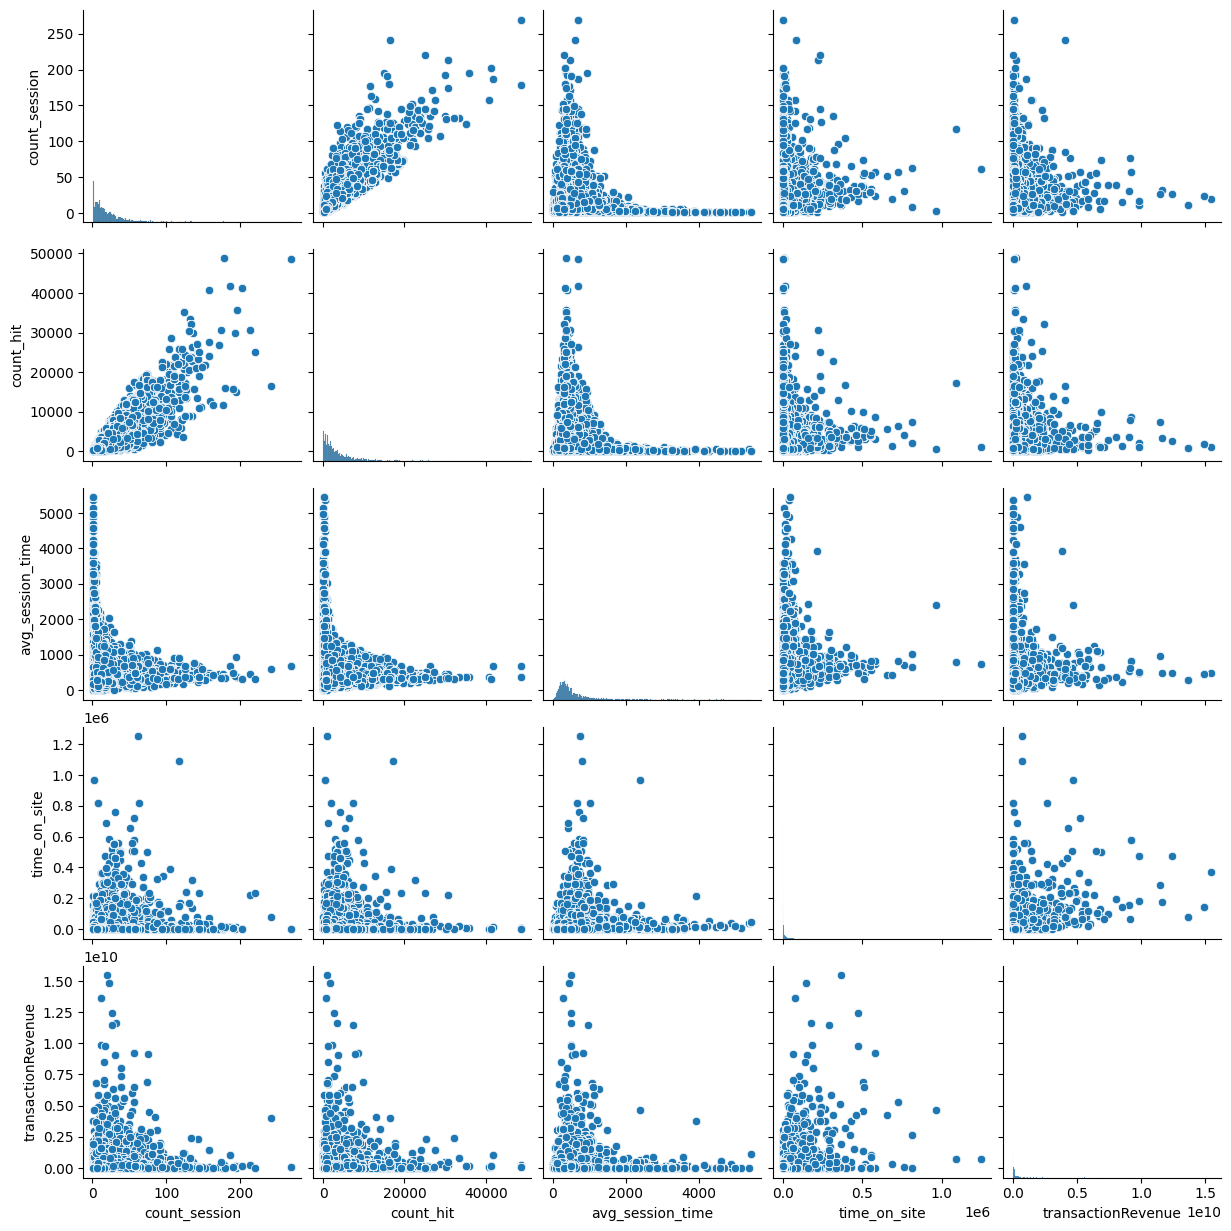

In [30]:
# Pair Plot
numerical_columns = ['count_session', 'count_hit', 'avg_session_time', 'time_on_site', 'transactionRevenue']

sns.pairplot(df[numerical_columns])
plt.show()

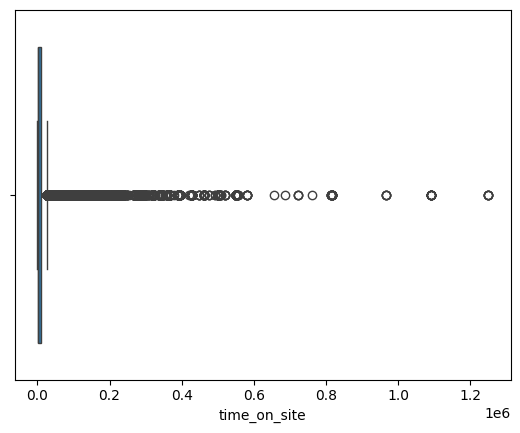

In [31]:
# Boxplots for numerical variables
sns.boxplot(x='time_on_site', data=df)
plt.show()

<ipython-input-32-10eb184aaae7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


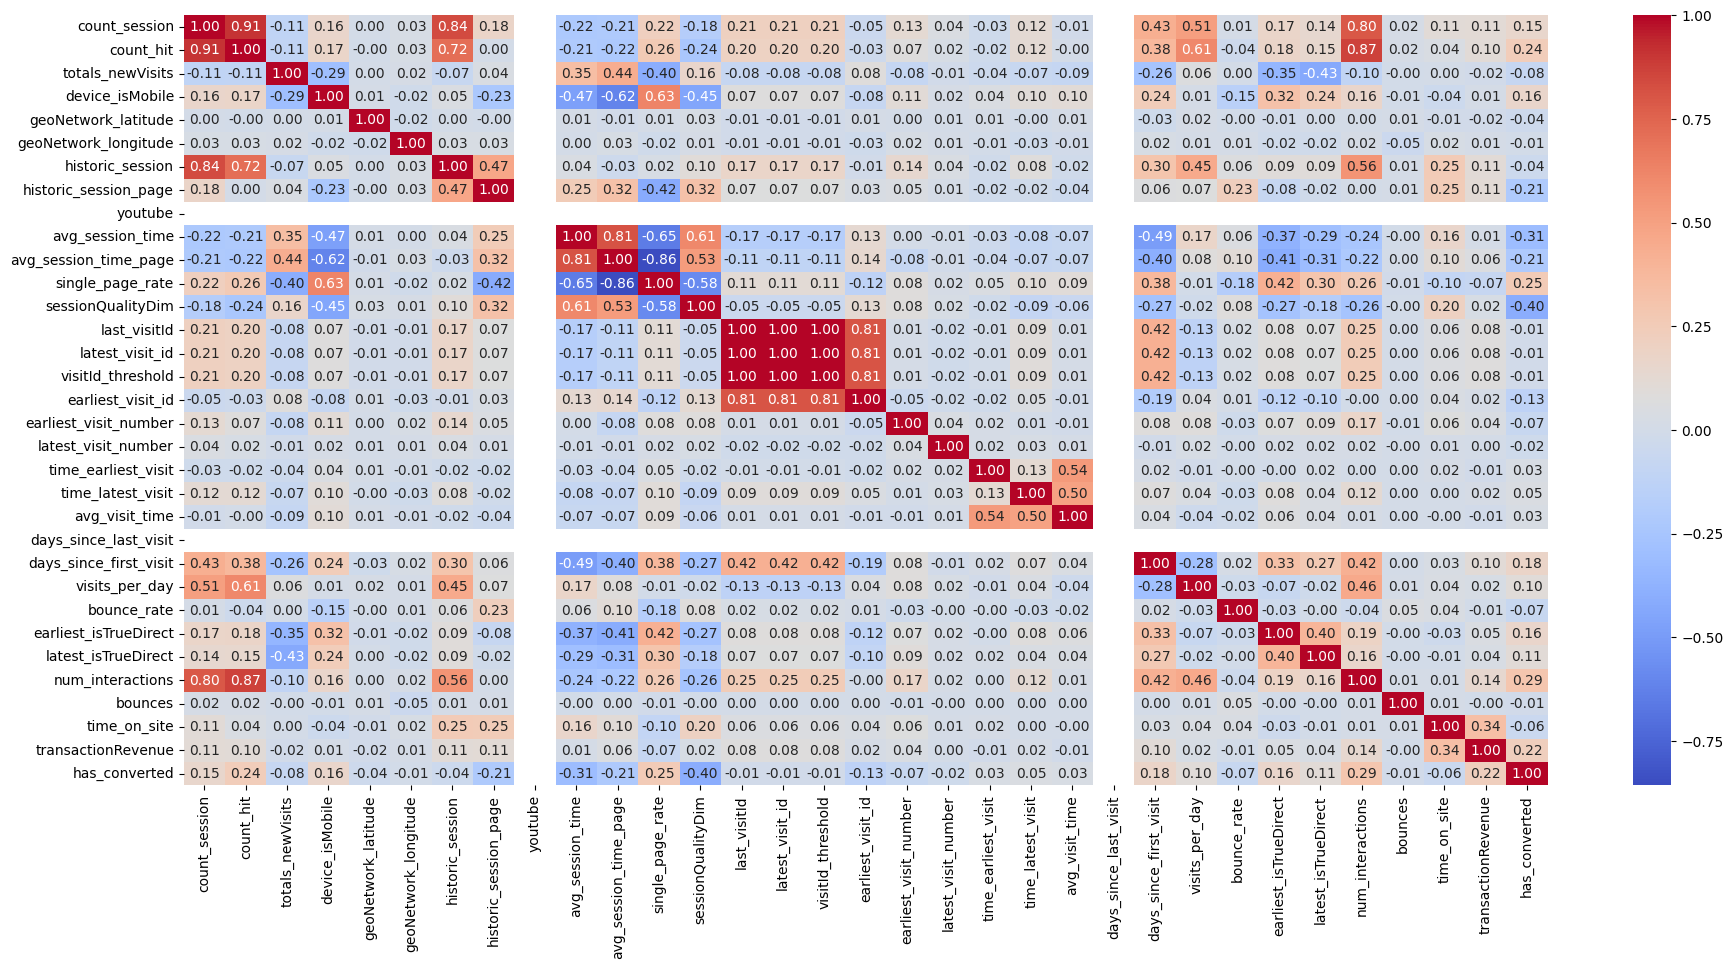

In [32]:
# Correlation Heatmap
plt.figure(figsize=(22, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

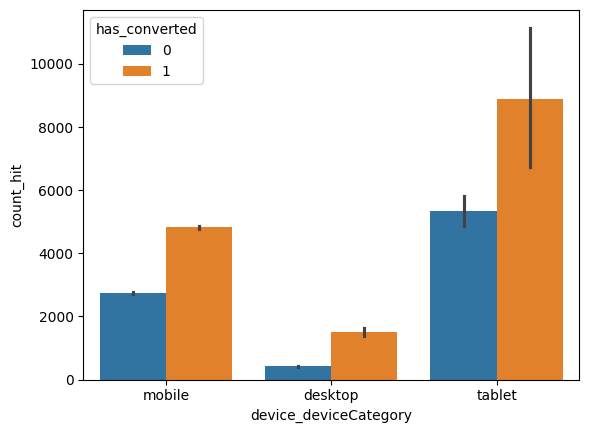

In [33]:
# Specify the actual column names
categorical_column = 'device_deviceCategory'
numerical_column = 'count_hit'

# Stacked Bar Chart
sns.barplot(x=categorical_column, y=numerical_column, hue='has_converted', data=df)
plt.show()


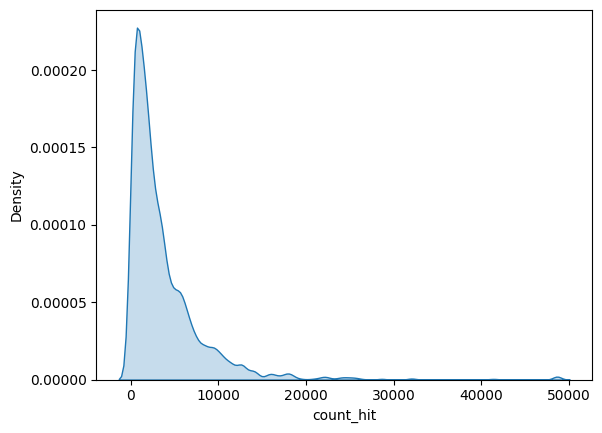

In [34]:
# Kernel Density Plot (KDE)
sns.kdeplot(df['count_hit'], fill=True)
plt.show()

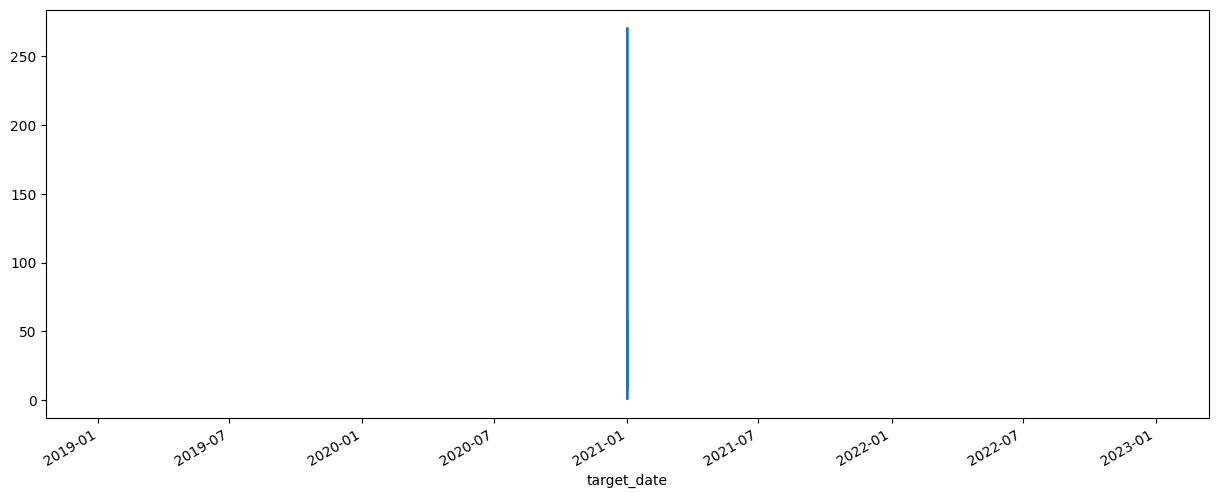

In [35]:
# Line Chart
df['target_date'] = pd.to_datetime(df['target_date'])
df.set_index('target_date')['count_session'].plot(figsize=(15, 6))
plt.show()


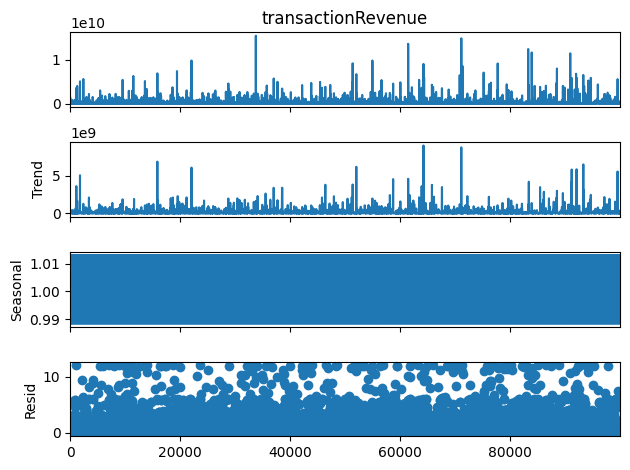

In [36]:
# Seasonal Decomposition of Time Series (STL)
from statsmodels.tsa.seasonal import seasonal_decompose

# Replace 'transactionRevenue' with the actual column name
# Add a small constant (1 in this case) to avoid zero values
result = seasonal_decompose(df['transactionRevenue'] + 1, model='multiplicative', period=12)
result.plot()
plt.show()


In [37]:
# df.info()

# STACK Analysis

In [38]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [39]:
# T-Test for significance

converted = df[df['has_converted'] == 1]['avg_session_time']
not_converted = df[df['has_converted'] == 0]['avg_session_time']

t_stat, p_value = ttest_ind(converted, not_converted, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: -101.68281986021069
P-Value: 0.0


In [40]:
# Chi-Square Test for Independence

observed = pd.crosstab(df['device_browser'], df['has_converted'])
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

Chi-Square Statistic: 3714.293608203444
P-Value: 0.0


In [41]:
print(df.columns)

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'historic_session_page',
       'youtube', 'avg_session_time', 'avg_session_time_page',
       'single_page_rate', 'sessionQualityDim', 'last_visitId',
       'latest_visit_id', 'visitId_threshold', 'earliest_visit_id',
       'earliest_visit_number', 'latest_visit_number', 'time_earliest_visit',
       'time_latest_visit', 'avg_visit_time', 'days_since_last_visit',
       'days_since_first_visit', 'visits_per_day', 'bounce_rate',
       'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium',
       'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
       'latest_isTrueDirect', 'num_interactions', 'bounces', 'time_on_site',
       'transactionRevenue', 'products_array', 'has_converted', 't

In [42]:
# Correlation Analysis

correlation_coefficient = df['count_hit'].corr(df['avg_session_time'])
print("Correlation Coefficient between 'count_hit' and 'avg_session_time':", correlation_coefficient)


Correlation Coefficient between 'count_hit' and 'avg_session_time': -0.21076340669278132


# Encode

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
df_encoded = pd.get_dummies(df, columns=['channelGrouping', 'device_browser', 'device_operatingSystem', 'geoNetwork_region'], drop_first=True)

In [45]:
label_encoder = LabelEncoder()

# Example with 'device_deviceCategory'
df['device_deviceCategory_encoded'] = label_encoder.fit_transform(df['device_deviceCategory'])


In [46]:
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col+'_encoded'] = label_encoder.fit_transform(df[col])


In [47]:
# List of categorical columns for one-hot encoding
categorical_columns = ['channelGrouping', 'device_browser', 'device_operatingSystem', 'device_deviceCategory',
                        'geoNetwork_region', 'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium',
                        'earliest_keyword', 'latest_keyword', 'products_array']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the encoded DataFrame
df_encoded.head()

count_session  count_hit  totals_newVisits  device_isMobile  \
0              9       1194                 0             True   
1              9       1194                 0             True   
2             28       1816                 0             True   
3              2        299                 0             True   
4              2        299                 0             True   

   geoNetwork_latitude  geoNetwork_longitude  historic_session  \
0              25.3463               55.4209              6504   
1              25.3463               55.4209              6504   
2              25.4052               55.5136             12466   
3              24.4539               54.3773              1575   
4              24.4539               54.3773              1575   

   historic_session_page  youtube  avg_session_time  ...  \
0                   1254        0        722.666667  ...   
1                   1254        0        722.666667  ...   
2                   4963        0        445.214286  ...   
3                      0        0        787.500000  ...   
4                      0        0        787.500000  ...   

   products_array_حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال  \
0                                                  0                                                                                                                                                                                             
1                                                  0                                                                                                                                                                                             
2                                                  0                                                                                                                                                                                             
3                                                  0                                                                                                                                                                                             
4                                                  0                                                                                                                                                                                             

   products_array_حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال////حفاضات_اطفال  \
0                                                  0                                                                                                                                                                                                                             
1                                                  0                                                                                                                                                                                                                             
2                                                  0                                                                                                                                                                                                                             
3                                                  0                                                                                                                                                                                                                             
4                        

In [48]:
df = df.drop(columns=categorical_column)

In [49]:
df.tail(3)

count_session  count_hit channelGrouping  totals_newVisits  \
99997             58      12340     Paid Search                 0   
99998             58      12340     Paid Search                 0   
99999             58      12340     Paid Search                 0   

        device_browser device_operatingSystem  device_isMobile  \
99997  GoogleAnalytics                    iOS             True   
99998  GoogleAnalytics                    iOS             True   
99999  GoogleAnalytics                    iOS             True   

      geoNetwork_region  geoNetwork_latitude  geoNetwork_longitude  ...  \
99997             Dubai              25.2048               55.2708  ...   
99998             Dubai              25.2048               55.2708  ...   
99999             Dubai              25.2048               55.2708  ...   

       device_browser_encoded  device_operatingSystem_encoded  \
99997                       5                               6   
99998                       5                               6   
99999                       5                               6   

       geoNetwork_region_encoded  earliest_source_encoded  \
99997                         25                       24   
99998                         25                       24   
99999                         25                       24   

       latest_source_encoded  earliest_medium_encoded  latest_medium_encoded  \
99997                      4                        7                      1   
99998                      4                        7                      1   
99999                      4                        7                      1   

       earliest_keyword_encoded  latest_keyword_encoded  \
99997                        89                      96   
99998                        89                      96   
99999                        89                      96   

       products_array_encoded  
99997                    2081  
99998                    2081  
99999                    2081  

[3 rows x 57 columns]

# Feature Selection

In [50]:
correlation_with_target = df.corr(numeric_only=True)['has_converted'].abs().sort_values(ascending=False)
selected_features_corr = correlation_with_target[1:6]  # Select the top 5 features (adjust as needed)
print("Selected Features based on Correlation:")
print(selected_features_corr)


Selected Features based on Correlation:
device_operatingSystem_encoded    0.513756
sessionQualityDim                 0.403283
avg_session_time                  0.311591
num_interactions                  0.294892
single_page_rate                  0.253616
Name: has_converted, dtype: float64


In [51]:
correlation_with_target = df.corr(numeric_only=True)['single_page_rate'].abs().sort_values(ascending=False)
selected_features_corr = correlation_with_target[1:6]  # Select the top 5 features (adjust as needed)
print("Selected Features based on Correlation:")
print(selected_features_corr)


Selected Features based on Correlation:
avg_session_time_page            0.856624
avg_session_time                 0.652510
device_isMobile                  0.627755
device_deviceCategory_encoded    0.612475
sessionQualityDim                0.581893
Name: single_page_rate, dtype: float64


In [52]:
correlation_with_target = df.corr(numeric_only=True)['num_interactions'].abs().sort_values(ascending=False)
selected_features_corr = correlation_with_target[1:6]  # Select the top 5 features (adjust as needed)
print("Selected Features based on Correlation:")
print(selected_features_corr)


Selected Features based on Correlation:
count_hit                 0.867587
count_session             0.795487
historic_session          0.562461
visits_per_day            0.462126
days_since_first_visit    0.420601
Name: num_interactions, dtype: float64


In [53]:
correlation_with_target = df.corr(numeric_only=True)['avg_session_time'].abs().sort_values(ascending=False)
selected_features_corr = correlation_with_target[1:6]  # Select the top 5 features (adjust as needed)
print("Selected Features based on Correlation:")
print(selected_features_corr)


Selected Features based on Correlation:
avg_session_time_page     0.813846
single_page_rate          0.652510
sessionQualityDim         0.611386
days_since_first_visit    0.488232
device_isMobile           0.473256
Name: avg_session_time, dtype: float64


In [54]:
correlation_with_target = df.corr(numeric_only=True)['sessionQualityDim'].abs().sort_values(ascending=False)
selected_features_corr = correlation_with_target[1:6]  # Select the top 5 features (adjust as needed)
print("Selected Features based on Correlation:")
print(selected_features_corr)


Selected Features based on Correlation:
avg_session_time                  0.611386
single_page_rate                  0.581893
device_operatingSystem_encoded    0.545032
avg_session_time_page             0.528013
device_isMobile                   0.445483
Name: sessionQualityDim, dtype: float64


In [55]:
correlation_with_target = df.corr(numeric_only=True)['device_operatingSystem_encoded'].abs().sort_values(ascending=False)
selected_features_corr = correlation_with_target[1:6]  # Select the top 5 features (adjust as needed)
print("Selected Features based on Correlation:")
print(selected_features_corr)


Selected Features based on Correlation:
sessionQualityDim         0.545032
products_array_encoded    0.523508
has_converted             0.513756
num_interactions          0.268585
avg_session_time          0.253386
Name: device_operatingSystem_encoded, dtype: float64


In [56]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Assuming X contains the features with categorical variables
X = df.select_dtypes(exclude=['datetime']).drop(columns=['has_converted'])
y = df['has_converted']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Create a ColumnTransformer to handle one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline with one-hot encoding and RandomForestClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(pipeline.named_steps['classifier'].feature_importances_, index=pipeline.named_steps['preprocessor'].get_feature_names_out(X.columns)).sort_values(ascending=False)
selected_features_rf = feature_importances[:5]  # Select the top 5 features (adjust as needed)
print("Selected Features based on RandomForest Feature Importance:")
print(selected_features_rf)


Selected Features based on RandomForest Feature Importance:
remainder__transactionRevenue                0.178358
remainder__products_array_encoded            0.077410
remainder__device_operatingSystem_encoded    0.046011
onehot__device_operatingSystem_iOS           0.035955
remainder__time_on_site                      0.033004
dtype: float64


In [ ]:
# X = df.select_dtypes(exclude=['datetime']).drop(columns=['has_converted'])
# y = df['has_converted']

# # Train a RandomForestClassifier
# rf_model = RandomForestClassifier()
# rf_model.fit(X, y)

# # Get feature importances
# feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
# selected_features_rf = feature_importances[:5]  # Select the top 5 features (adjust as needed)
# print("Selected Features based on RandomForest Feature Importance:")
# print(selected_features_rf)

In [ ]:
# df['other']

In [63]:
selected_features = set(selected_features_corr.index).union(set(selected_features_rf.index))
print("Final Selected Features:")
print(selected_features)


Final Selected Features:
{'remainder__transactionRevenue', 'avg_session_time', 'remainder__device_operatingSystem_encoded', 'remainder__products_array_encoded', 'remainder__time_on_site', 'has_converted', 'sessionQualityDim', 'onehot__device_operatingSystem_iOS', 'num_interactions', 'products_array_encoded'}


In [64]:
common_features = list(selected_features.intersection(df.columns))
df_selected = df[common_features].copy()


# Models Build

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# X_encoded = pd.get_dummies(X, columns=['channelGrouping', 'device_browser', 'device_operatingSystem',
#                                        'geoNetwork_region', 'earliest_source', 'latest_source',
#                                        'earliest_medium', 'latest_medium', 'earliest_keyword',
#                                        'latest_keyword', 'products_array'])

# # Train a RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(X_encoded, y_train)

In [ ]:
# Identify columns with non-numeric data
non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns

print("Non-numeric columns:")
print(non_numeric_columns)


Non-numeric columns:
Index(['channelGrouping', 'device_browser', 'device_operatingSystem',
       'device_isMobile', 'device_deviceCategory', 'geoNetwork_region',
       'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium',
       'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
       'latest_isTrueDirect', 'products_array'],
      dtype='object')


In [67]:
df['channelGrouping']

0            (Other)
1            (Other)
2        Paid Search
3        Paid Search
4        Paid Search
            ...     
99995    Paid Search
99996    Paid Search
99997    Paid Search
99998    Paid Search
99999    Paid Search
Name: channelGrouping, Length: 100000, dtype: object

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your original DataFrame with X and y
X = df.drop(columns=['has_converted', 'target_date'])  # Exclude target variable and any date columns
y = df['has_converted']

# Identify categorical columns
categorical_columns = ['channelGrouping', 'device_browser', 'device_operatingSystem',
                        'geoNetwork_region', 'earliest_source', 'latest_source',
                        'earliest_medium', 'latest_medium', 'earliest_keyword',
                        'latest_keyword', 'products_array', 'device_isMobile',
                        'device_deviceCategory', 'earliest_isTrueDirect', 'latest_isTrueDirect']

# Check if 'device_deviceCategory' is present in X
if 'device_deviceCategory' not in X.columns:
    # If not present, use the encoded version (assuming it was encoded before)
    categorical_columns.remove('device_deviceCategory')
    categorical_columns += ['device_deviceCategory_encoded']

# Create a new DataFrame with the target variable and categorical columns
X_categorical = X[categorical_columns]

# Encode categorical variables
X_encoded = pd.get_dummies(X_categorical, columns=categorical_columns)

# Add the remaining non-categorical columns
non_categorical_columns = X.columns.difference(categorical_columns)
X_encoded[non_categorical_columns] = X[non_categorical_columns]

# Split the data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_encoded)

# Accuracy finding
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Additional metrics
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


Accuracy: 0.9967
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      9693
           1       1.00      0.99      1.00     10307

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
 [[ 9689     4]
 [   62 10245]]


In [69]:
df.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'geoNetwork_region', 'geoNetwork_latitude', 'geoNetwork_longitude',
       'historic_session', 'historic_session_page', 'youtube',
       'avg_session_time', 'avg_session_time_page', 'single_page_rate',
       'sessionQualityDim', 'last_visitId', 'latest_visit_id',
       'visitId_threshold', 'earliest_visit_id', 'earliest_visit_number',
       'latest_visit_number', 'time_earliest_visit', 'time_latest_visit',
       'avg_visit_time', 'days_since_last_visit', 'days_since_first_visit',
       'visits_per_day', 'bounce_rate', 'earliest_source', 'latest_source',
       'earliest_medium', 'latest_medium', 'earliest_keyword',
       'latest_keyword', 'earliest_isTrueDirect', 'latest_isTrueDirect',
       'num_interactions', 'bounces', 'time_on_site', 'transactionRevenue',
       'products_array', 'has_converted', 'target_date',
       'devi

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your original DataFrame with X and y
X = df.drop(columns=['has_converted', 'target_date'])  # Exclude target variable and any date columns
y = df['has_converted']

# Identify categorical columns
categorical_columns = ['channelGrouping', 'device_browser', 'device_operatingSystem',
                        'geoNetwork_region', 'earliest_source', 'latest_source',
                        'earliest_medium', 'latest_medium', 'earliest_keyword',
                        'latest_keyword', 'products_array', 'device_isMobile',
                        'earliest_isTrueDirect', 'latest_isTrueDirect']

# Check if 'device_deviceCategory' is present in X
if 'device_deviceCategory' in X.columns:
    # If present, include it in the list of categorical columns
    categorical_columns.append('device_deviceCategory')

# Encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Add the remaining non-categorical columns
non_categorical_columns = X.columns.difference(categorical_columns)
X_encoded[non_categorical_columns] = X[non_categorical_columns]

# Split the data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    # Add more hyperparameters as needed
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_encoded, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final model using the best hyperparameters
final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train_encoded, y_train)

# Make predictions on the test set
final_predictions = final_model.predict(X_test_encoded)

# Accuracy finding for the final model
final_accuracy = accuracy_score(y_test, final_predictions)
print("Final Model Accuracy:", final_accuracy)

# Additional metrics for the final model
print("Final Model Classification Report:\n", classification_report(y_test, final_predictions))
print("Final Model Confusion Matrix:\n", confusion_matrix(y_test, final_predictions))


Best Hyperparameters: {'max_depth': None, 'n_estimators': 100}
Final Model Accuracy: 0.997
Final Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      9693
           1       1.00      0.99      1.00     10307

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Final Model Confusion Matrix:
 [[ 9689     4]
 [   56 10251]]


In [78]:

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     # Add more hyperparameters as needed
# }

# # Perform grid search
# grid_search = GridSearchCV(model, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Get best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Train the final model using the best hyperparameters
# final_model = RandomForestClassifier(**best_params)
# final_model.fit(X_encoded, y)

# Save file

In [80]:
import pickle

# Save the final model to a file
with open('ecom.pkl', 'wb') as model_file:
    pickle.dump(final_model, model_file)

In [81]:
# Load the model from the file
with open('ecom.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [82]:
# Save the dataframe
df.to_csv("df1.csv",index= False)

# Comparision between entire models build

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [ ]:
df.tail()

In [ ]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)


In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [ ]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

In [ ]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [ ]:
# Evaluate models
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(f"{model_name} Metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)

    # Display confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    print("\n")


In [ ]:
# Evaluate each model
evaluate_model("Random Forest", y_test, rf_predictions)
evaluate_model("Decision Tree", y_test, dt_predictions)
evaluate_model("SVM", y_test, svm_predictions)
evaluate_model("KNN", y_test, knn_predictions)
evaluate_model("Logistic Regression", y_test, lr_predictions)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# # Assuming 'y' is a continuous target variable for regression
# from sklearn.model_selection import train_test_split
# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# # Choose Random Forest Regressor as the model
# model_rf_reg = RandomForestRegressor()

# # Train the model
# model_rf_reg.fit(X_train_reg, y_train_reg)

# # Make predictions
# predictions_rf_reg = model_rf_reg.predict(X_test_reg)

# # Evaluate the model
# from sklearn.metrics import mean_squared_error, r2_score
# mse = mean_squared_error(y_test_reg, predictions_rf_reg)
# r2 = r2_score(y_test_reg, predictions_rf_reg)

# print("Random Forest Regressor Mean Squared Error:", mse)
# print("Random Forest Regressor R^2 Score:", r2)


In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier

# # Choose Gradient Boosting as the model
# model_gb = GradientBoostingClassifier()

# # Train the model
# model_gb.fit(X_train, y_train)

# # Make predictions
# predictions_gb = model_gb.predict(X_test)

# # Evaluate the model
# accuracy_gb = accuracy_score(y_test, predictions_gb)
# print("Gradient Boosting Accuracy:", accuracy_gb)

# # Additional metrics
# print("Classification Report:\n", classification_report(y_test, predictions_gb))
# print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_gb))


In [ ]:
# from sklearn.svm import SVC

# # Choose Support Vector Machine as the model
# model_svm = SVC()

# # Train the model
# model_svm.fit(X_train, y_train)

# # Make predictions
# predictions_svm = model_svm.predict(X_test)

# # Evaluate the model
# accuracy_svm = accuracy_score(y_test, predictions_svm)
# print("SVM Accuracy:", accuracy_svm)

# # Additional metrics
# print("Classification Report:\n", classification_report(y_test, predictions_svm))
# print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_svm))


In [ ]:
# from sklearn.linear_model import LogisticRegression

# # Choose Logistic Regression as the model
# model_lr = LogisticRegression()

# # Train the model
# model_lr.fit(X_train, y_train)

# # Make predictions
# predictions_lr = model_lr.predict(X_test)

# # Evaluate the model
# accuracy_lr = accuracy_score(y_test, predictions_lr)
# print("Logistic Regression Accuracy:", accuracy_lr)

# # Additional metrics
# print("Classification Report:\n", classification_report(y_test, predictions_lr))
# print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_lr))


In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# # Choose Decision Tree as the model
# model_dt = DecisionTreeClassifier()

# # Train the model
# model_dt.fit(X_train, y_train)

# # Make predictions
# predictions_dt = model_dt.predict(X_test)

# # Evaluate the model
# accuracy_dt = accuracy_score(y_test, predictions_dt)
# print("Decision Tree Accuracy:", accuracy_dt)

# # Additional metrics
# print("Classification Report:\n", classification_report(y_test, predictions_dt))
# print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_dt))


In [ ]:
# from sklearn.naive_bayes import GaussianNB

# # Choose Naive Bayes as the model
# model_nb = GaussianNB()

# # Train the model
# model_nb.fit(X_train, y_train)

# # Make predictions
# predictions_nb = model_nb.predict(X_test)

# # Evaluate the model
# accuracy_nb = accuracy_score(y_test, predictions_nb)
# print("Naive Bayes Accuracy:", accuracy_nb)

# # Additional metrics
# print("Classification Report:\n", classification_report(y_test, predictions_nb))
# print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_nb))


In [ ]:
# from xgboost import XGBClassifier

# # Choose XGBoost as the model
# model_xgb = XGBClassifier()

# # Train the model
# model_xgb.fit(X_train, y_train)

# # Make predictions
# predictions_xgb = model_xgb.predict(X_test)

# # Evaluate the model
# accuracy_xgb = accuracy_score(y_test, predictions_xgb)
# print("XGBoost Classifier Accuracy:", accuracy_xgb)

# # Additional metrics
# print("Classification Report:\n", classification_report(y_test, predictions_xgb))
# print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_xgb))


In [ ]:
# from sklearn.ensemble import AdaBoostClassifier

# # Choose AdaBoost as the model
# model_adaboost = AdaBoostClassifier()

# # Train the model
# model_adaboost.fit(X_train, y_train)

# # Make predictions
# predictions_adaboost = model_adaboost.predict(X_test)

# # Evaluate the model
# accuracy_adaboost = accuracy_score(y_test, predictions_adaboost)
# print("AdaBoost Classifier Accuracy:", accuracy_adaboost)

# # Additional metrics
# print("Classification Report:\n", classification_report(y_test, predictions_adaboost))
# print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_adaboost))


In [ ]:
# from sklearn.cluster import KMeans

# # Assume 'X' is your feature matrix
# # Choose the number of clusters (adjust 'n_clusters' based on your data)
# n_clusters = 3
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# # Fit the K-Means model
# kmeans.fit(X)

# # Get cluster labels
# cluster_labels = kmeans.labels_

# # Explore the cluster assignments and perform further analysis


In [ ]:
# from sklearn.decomposition import PCA

# # Assume 'X' is your feature matrix
# # Choose the number of components (adjust 'n_components' based on your preference)
# n_components = 2
# pca = PCA(n_components=n_components)

# # Fit and transform the data using PCA
# X_pca = pca.fit_transform(X)

# # Explore the transformed data and perform further analysis


In [ ]:
# from sklearn.ensemble import IsolationForest

# # Assume 'X' is your feature matrix
# # Choose the contamination parameter (adjust 'contamination' based on your data)
# contamination = 0.05  # Example: 5% of the data is considered as outliers
# iso_forest = IsolationForest(contamination=contamination, random_state=42)

# # Fit the Isolation Forest model
# iso_forest.fit(X)

# # Predict outliers (1 for inliers, -1 for outliers)
# outlier_predictions = iso_forest.predict(X)

# # Explore the predictions and perform further analysis


In [ ]:
# from sklearn.mixture import GaussianMixture

# # Assume 'X' is your feature matrix
# # Choose the number of components (clusters) in the Gaussian Mixture Model
# n_components_gmm = 3
# gmm = GaussianMixture(n_components=n_components_gmm, random_state=42)

# # Fit the GMM model
# gmm.fit(X)

# # Get cluster assignments
# gmm_cluster_labels = gmm.predict(X)

# # Explore the cluster assignments and perform further analysis


In [ ]:
# from sklearn.svm import OneClassSVM

# # Assume 'X' is your feature matrix
# # Choose the kernel and other hyperparameters based on your data
# svm = OneClassSVM(kernel='rbf', nu=0.05)  # Example hyperparameters

# # Fit the One-Class SVM model
# svm.fit(X)

# # Predict inliers (1 for inliers, -1 for outliers)
# svm_predictions = svm.predict(X)

# # Explore the predictions and perform further analysis


In [ ]:
# from sklearn.neural_network import MLPClassifier

# # Assume 'X' is your feature matrix and 'y' is the target variable for classification
# # Choose the architecture and hyperparameters based on your data
# mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)  # Example hyperparameters

# # Train the Neural Network model
# mlp.fit(X_train, y_train)

# # Make predictions
# predictions_nn = mlp.predict(X_test)

# # Evaluate the model
# accuracy_nn = accuracy_score(y_test, predictions_nn)
# print("Neural Network Accuracy:", accuracy_nn)

# # Additional metrics
# print("Classification Report:\n", classification_report(y_test, predictions_nn))
# print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_nn))


In [ ]:
# from sklearn.cluster import KMeans

# # Assume 'X' is your feature matrix
# # Choose the number of clusters (adjust 'n_clusters' based on your data)
# n_clusters_kmeans = 3
# kmeans_pp = KMeans(n_clusters=n_clusters_kmeans, init='k-means++', random_state=42)

# # Fit the K-Means model with K-Means++ initialization
# kmeans_pp.fit(X)

# # Get cluster labels
# kmeans_pp_cluster_labels = kmeans_pp.labels_

# # Explore the cluster assignments and perform further analysis


# Image Analysis

In [79]:
import keras-ocr

SyntaxError: invalid syntax (<ipython-input-79-e274fbe7b49c>, line 1)